# Análise Exploratória de Dados (EDA) da TechSales Inc.

## Problema a Ser Resolvido

A TechSales Inc. precisa de sua ajuda para entender os fatores que influenciam o sucesso das vendas e identificar oportunidades de melhoria. A empresa quer respostas para perguntas do tipo:

1. Quais são os principais fatores que determinam se uma oportunidade será ganha ou perdida?
2. Quais produtos têm maior impacto nas vendas e como podemos otimizar nosso portfólio de produtos?
3. Como o desempenho das diferentes equipes de vendas varia e o que podemos aprender com as equipes de melhor desempenho?
4. Quais características dos clientes estão mais associadas ao fechamento de negócios e como podemos segmentar nossos esforços de vendas para melhor atender a esses clientes?



Neste notebook, iremos realizar a EDA desse projeto, buscando obter os insights valiosos requisitados pela TechSales Inc.



In [1]:
# Importando as Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from IPython.display import display

In [2]:
# Importando a base de dados
base_final = pd.read_csv('/content/base_final_eda.csv')

## Analise Exploratória

Iremos agora realizar uma análise exploratória dos dados, dividindo-a em cinco vias principais. A primeira via consistirá em uma análise geral do case, buscando obter insights preliminares. As outras vias se concentrarão em pontos mais específicos, como o impacto dos produtos, as características das empresas e dos clientes. Ao final de cada tópico, geraremos gráficos para obter mais informações sobre o case e obter insights adicionais.

In [3]:
# Verificando a base de dados
base_final.head()

,Unnamed: 0,sales_agent,product,account,deal_stage,close_value,sector,year_established,revenue,employees,office_location,subsidiary_of,series,sales_price,time_until_close,manager,regional_office
0,0,Moses Frase,GTX Plus Basic,Cancity,Won,1054.0,retail,2001.0,718.62,2448.0,United States,0,GTX,1096,132.0,Dustin Brinkmann,Central
1,1,Darcel Schlecht,GTX Pro,Isdom,Won,4514.0,medical,2002.0,3178.24,4540.0,United States,0,GTX,4821,137.0,Melvin Marxen,Central
2,2,Darcel Schlecht,MG Special,Cancity,Won,50.0,retail,2001.0,718.62,2448.0,United States,0,MG,55,133.0,Melvin Marxen,Central
3,3,Moses Frase,GTX Basic,Codehow,Won,588.0,software,1998.0,2714.90,2641.0,United States,Acme Corporation,GTX,550,135.0,Dustin Brinkmann,Central
4,4,Zane Levy,GTX Basic,Hatfan,Won,517.0,services,1982.0,792.46,1299.0,United States,0,GTX,550,128.0,Summer Sewald,West


In [4]:
# Verificando dados nulos
base_final.isnull().sum()

Unnamed: 0          0
sales_agent         0
product             0
account             0
deal_stage          0
close_value         0
sector              0
year_established    0
revenue             0
employees           0
office_location     0
subsidiary_of       0
series              0
sales_price         0
time_until_close    0
manager             0
regional_office     0
dtype: int64

In [5]:
# Verificando dados duplicados
base_final.duplicated().sum()

0

In [6]:
# Verificando informações da base final
base_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        8448 non-null   int64  
 1   sales_agent       8448 non-null   object 
 2   product           8448 non-null   object 
 3   account           8448 non-null   object 
 4   deal_stage        8448 non-null   object 
 5   close_value       8448 non-null   float64
 6   sector            8448 non-null   object 
 7   year_established  8448 non-null   float64
 8   revenue           8448 non-null   float64
 9   employees         8448 non-null   float64
 10  office_location   8448 non-null   object 
 11  subsidiary_of     8448 non-null   object 
 12  series            8448 non-null   object 
 13  sales_price       8448 non-null   int64  
 14  time_until_close  8448 non-null   float64
 15  manager           8448 non-null   object 
 16  regional_office   8448 non-null   object 


In [7]:
# Excluindo uma coluna desnecessária
base_final = base_final.drop(base_final.columns[0], axis=1)

In [8]:
# Conferindo
base_final.head()

,sales_agent,product,account,deal_stage,close_value,sector,year_established,revenue,employees,office_location,subsidiary_of,series,sales_price,time_until_close,manager,regional_office
0,Moses Frase,GTX Plus Basic,Cancity,Won,1054.0,retail,2001.0,718.62,2448.0,United States,0,GTX,1096,132.0,Dustin Brinkmann,Central
1,Darcel Schlecht,GTX Pro,Isdom,Won,4514.0,medical,2002.0,3178.24,4540.0,United States,0,GTX,4821,137.0,Melvin Marxen,Central
2,Darcel Schlecht,MG Special,Cancity,Won,50.0,retail,2001.0,718.62,2448.0,United States,0,MG,55,133.0,Melvin Marxen,Central
3,Moses Frase,GTX Basic,Codehow,Won,588.0,software,1998.0,2714.90,2641.0,United States,Acme Corporation,GTX,550,135.0,Dustin Brinkmann,Central
4,Zane Levy,GTX Basic,Hatfan,Won,517.0,services,1982.0,792.46,1299.0,United States,0,GTX,550,128.0,Summer Sewald,West


In [9]:
# Analisando estatísticas gerais da base
base_final.describe()

,close_value,year_established,revenue,employees,sales_price,time_until_close
count,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000,8448.000000
mean,1184.367188,1740.613163,2152.766101,4974.456913,2393.474905,38.119081
std,2154.337701,666.147541,2561.440147,6646.913578,2651.089856,41.415282
min,0.000000,0.000000,0.000000,0.000000,55.000000,0.000000
25%,0.000000,1985.000000,326.820000,799.000000,550.000000,2.000000
50%,43.500000,1993.000000,1223.720000,2641.000000,1096.000000,11.000000
75%,1121.000000,2000.000000,2871.350000,6837.000000,4821.000000,77.000000
max,30288.000000,2017.000000,11698.030000,34288.000000,26768.000000,138.000000


**Dicionário dos Dados**
- sales_agent: Nome do agente de vendas.
- product: Nome do produto vendido.
- account: Nome da conta do cliente.
- deal_stage: Estágio do negócio (por exemplo, Ganho ou Perdido).
- close_value: Valor do negócio fechado.
- sector: Setor da empresa cliente.
- year_established: Ano de fundação da empresa cliente.
- revenue: Receita da empresa cliente.
- employees: Número de funcionários da empresa cliente.
- office_location: Localização do escritório da empresa cliente.
- subsidiary_of: Holding responsável pela empresa.
- series: Série do produto vendido.
- sales_price: Preço de venda do produto.
- time_until_close: Tempo até o fechamento do negócio (em dias).
- manager: Nome do gerente responsável.
- regional_office: Escritório regional responsável.

Vamos realizar uma análise para calcular as porcentagens de cada estágio da negociação em nossa base de dados. Esse processo é fundamental para compreendermos a efetividade de cada etapa do processo de vendas, permitindo identificar onde podemos melhorar e otimizar nossas estratégias para aumentar a taxa de conversão e, consequentemente, as vendas concluídas.

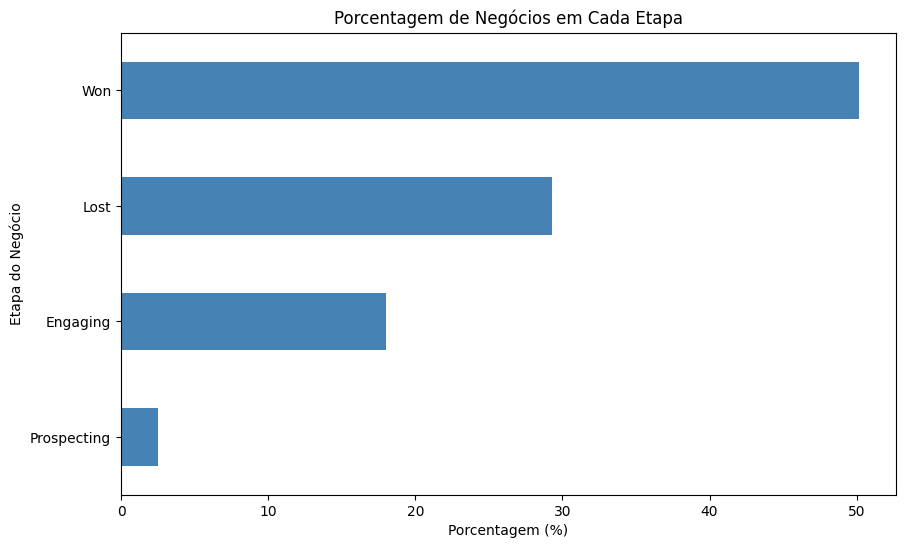

Porcentagens de 'deal_stage':
Won: 50.17%
Lost: 29.27%
Engaging: 18.04%
Prospecting: 2.52%


In [10]:
# Calcular as porcentagens de cada valor único em 'deal_stage'
porcentagens = base_final['deal_stage'].value_counts(normalize=True) * 100

# Criar um gráfico de barras horizontais
plt.figure(figsize=(10, 6))
porcentagens.sort_values().plot(kind='barh', color='steelblue')
plt.xlabel('Porcentagem (%)')
plt.ylabel('Etapa do Negócio')
plt.title('Porcentagem de Negócios em Cada Etapa')
plt.show()

# Exibir as porcentagens formatadas
print("Porcentagens de 'deal_stage':")
for valor, porcentagem in porcentagens.items():
    print(f"{valor}: {porcentagem:.2f}%")


Vamos criar uma base com codificação de variáveis categóricas e aplicar o MinMaxScaler para verificar as correlações com os estágios de negociação. O uso dessa metodologia é importante porque, com apenas a base final, não podemos fazer essa análise devido à existência de muitas variáveis categóricas e à falta de normalização dos dados.

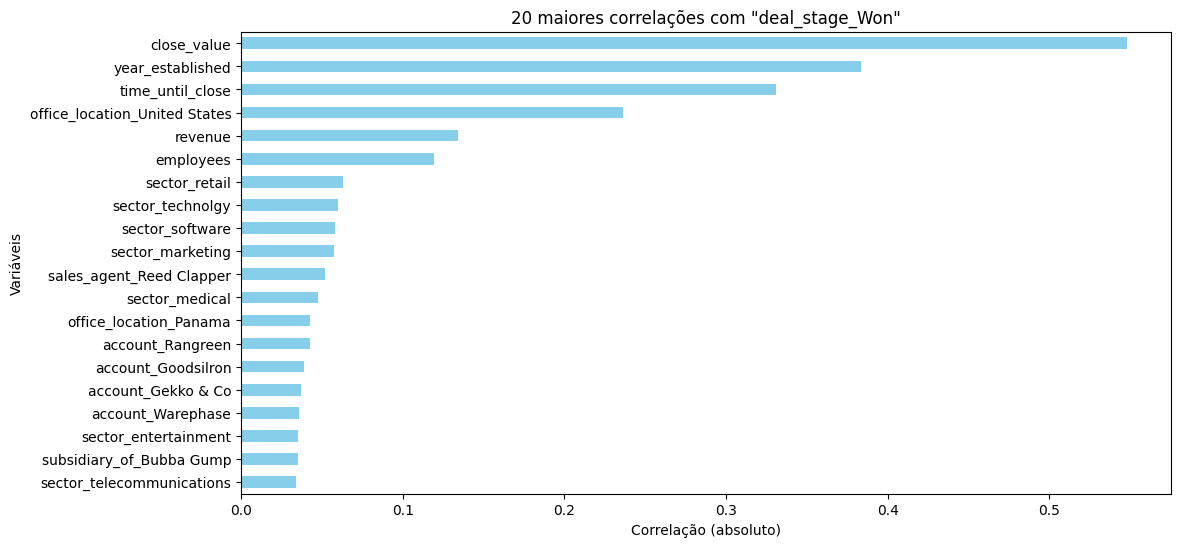

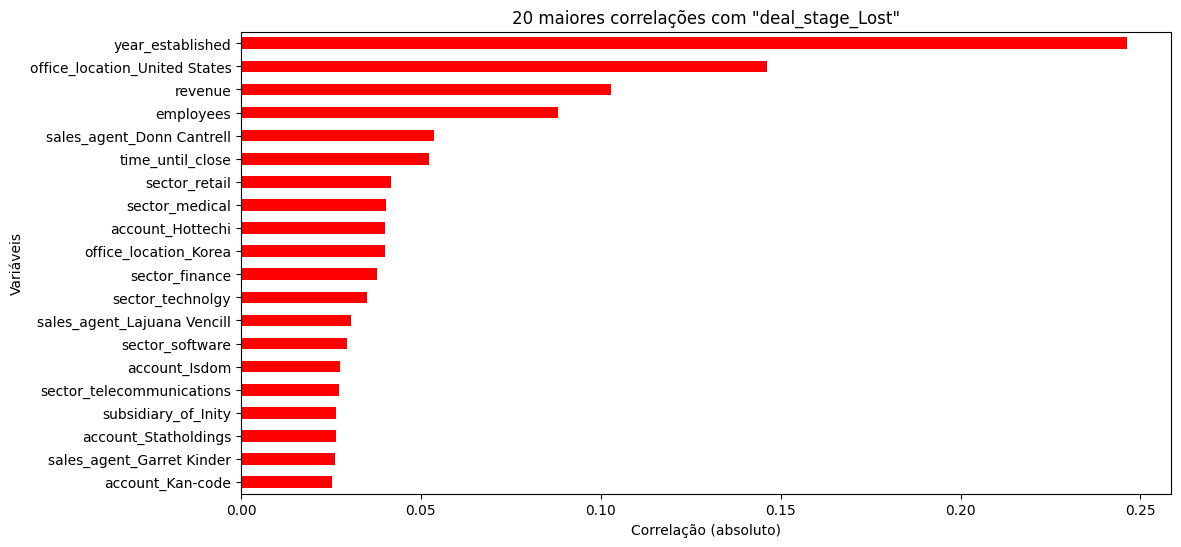

In [11]:
# Converter colunas categóricas em colunas numéricas usando one-hot encoding
base_final_encoded = pd.get_dummies(base_final)

# Converter True para 1 e False para 0 em todas as colunas
base_final_encoded = base_final_encoded.astype(int)

# Inicializar o MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Aplicar a escala min-max em todas as colunas do DataFrame
base_final_scaled = scaler.fit_transform(base_final_encoded)

# Converter o resultado de volta para um DataFrame
base_final_scaled = pd.DataFrame(base_final_scaled, columns=base_final_encoded.columns)

# Calculando a matriz de correlação
correlation_matrix = base_final_encoded.corr()

# Selecionando as 20 maiores correlações em termos absolutos com a coluna 'deal_stage_Won'
correlations_won = correlation_matrix['deal_stage_Won'].drop('deal_stage_Won').nlargest(20)

# Criando um gráfico de barras para as 20 maiores correlações com "deal_stage_Won"
plt.figure(figsize=(12, 6))
correlations_won.sort_values().plot(kind='barh', color='skyblue')
plt.title('20 maiores correlações com "deal_stage_Won"')
plt.xlabel('Correlação (absoluto)')
plt.ylabel('Variáveis')
plt.show()

# Selecionando as 20 maiores correlações em termos absolutos com a coluna 'deal_stage_Lost'
correlations_lost = correlation_matrix['deal_stage_Lost'].drop('deal_stage_Lost').nlargest(20)

# Criando um gráfico de barras para as 20 maiores correlações com "deal_stage_Lost"
plt.figure(figsize=(12, 6))
correlations_lost.sort_values().plot(kind='barh', color='red')
plt.title('20 maiores correlações com "deal_stage_Lost"')
plt.xlabel('Correlação (absoluto)')
plt.ylabel('Variáveis')
plt.show()

A análise das características de negócios fechados (Won) e perdidos (Lost) foi realizada com o objetivo de identificar os fatores fundamentais para classificar um negócio como "Lost" ou "Won". Foram comparadas as variáveis apresentadas nas duas listas de correlação para encontrar pontos em comum e características específicas de cada categoria.

- **Pontos em Comum**:

Foram identificadas seis variáveis que aparecem em ambas as listas, indicando seu impacto significativo em negócios fechados e perdidos. Destacam-se a antiguidade da empresa (year_established), a localização nos Estados Unidos (office_location_United States), a receita (revenue), o número de empregados (employees), o tempo até o fechamento do negócio (time_until_close) e o setor de varejo (sector_retail).

- **Pontos Específicos**:

Algumas variáveis aparecem apenas em uma das listas, o que pode indicar características exclusivas de negócios fechados ou perdidos. Por exemplo, a variável close_value tem alta correlação com negócios fechados, enquanto sales_agent_Donn Cantrell e sector_medical estão associados a negócios perdidos.

- **Pontos Principais para Analisar**:

É importante analisar como a antiguidade da empresa, a localização, a receita, o número de empregados, o tempo até o fechamento e o setor de atuação influenciam nos resultados dos negócios. Além disso, as variáveis exclusivas de cada categoria podem fornecer insights adicionais sobre os fatores que levam ao sucesso ou à perda de um negócio.

- **Conclusão**:

A análise das características de negócios fechados e perdidos proporcionou insights valiosos para entender os fatores que influenciam nos resultados. O próximo passo será dividir a base de dados em categorias "Won" e "Lost" e criar gráficos para explorar essas relações de forma mais detalhada.


- **OBS**: A alta correlação entre 'close_value' e a tabela deal_Won é esperada, pois 'close_value' é 0 quando o negócio não é fechado. Ou seja, se o negócio foi concluído com sucesso (deal_Won), o 'close_value' será maior que 0. No entanto, essa correlação não é crucial para nossa análise, pois é uma relação direta entre o fechamento do negócio e o valor final, o que é esperado. Portanto não focaremos nesse ponto na análise.

### 1- Fatores determinantes

Vamos explorar as principais correlações identificadas para obter insights valiosos. Para isso, iremos dividir a base final em duas partes distintas: uma que representa os negócios fechados com sucesso e outra que representa os negócios que não foram concluídos. Em seguida, vamos criar gráficos comparativos para analisar as correlações mais significativas que podem ter influenciado no fechamento ou não dos negócios.

Essa abordagem nos permitirá visualizar de forma mais clara como as diferentes variáveis estão relacionadas com o sucesso ou fracasso de um negócio, fornecendo insights cruciais para a tomada de decisões estratégicas. Além de permitir a visualização do comparativo, essa análise nos permitirá observar onde existe uma maior concentração de vendas. Ao comparar as correlações entre os dois grupos de negócios, poderemos identificar padrões e tendências que nos ajudarão a entender melhor os fatores determinantes para o fechamento de negócios.








In [12]:
# Dividindo a base
base_won = base_final[base_final['deal_stage'] == 'Won']
base_lost = base_final[base_final['deal_stage'] == 'Lost']

In [13]:
# Verificando a base de negócios fechados
base_won.head()

,sales_agent,product,account,deal_stage,close_value,sector,year_established,revenue,employees,office_location,subsidiary_of,series,sales_price,time_until_close,manager,regional_office
0,Moses Frase,GTX Plus Basic,Cancity,Won,1054.0,retail,2001.0,718.62,2448.0,United States,0,GTX,1096,132.0,Dustin Brinkmann,Central
1,Darcel Schlecht,GTX Pro,Isdom,Won,4514.0,medical,2002.0,3178.24,4540.0,United States,0,GTX,4821,137.0,Melvin Marxen,Central
2,Darcel Schlecht,MG Special,Cancity,Won,50.0,retail,2001.0,718.62,2448.0,United States,0,MG,55,133.0,Melvin Marxen,Central
3,Moses Frase,GTX Basic,Codehow,Won,588.0,software,1998.0,2714.90,2641.0,United States,Acme Corporation,GTX,550,135.0,Dustin Brinkmann,Central
4,Zane Levy,GTX Basic,Hatfan,Won,517.0,services,1982.0,792.46,1299.0,United States,0,GTX,550,128.0,Summer Sewald,West


In [14]:
# Verificando a base de negócios não fechados
base_lost.head()

,sales_agent,product,account,deal_stage,close_value,sector,year_established,revenue,employees,office_location,subsidiary_of,series,sales_price,time_until_close,manager,regional_office
11,Gladys Colclough,GTX Pro,Genco Pura Olive Oil Company,Lost,0.0,retail,2007.0,894.33,1635.0,Italy,0,GTX,4821,134.0,Melvin Marxen,Central
15,Rosalina Dieter,MG Special,Sonron,Lost,0.0,telecommunications,1999.0,1699.85,5108.0,United States,0,MG,55,118.0,Celia Rouche,West
18,Daniell Hammack,GTX Pro,Xx-zobam,Lost,0.0,entertainment,1989.0,3838.39,8274.0,United States,0,GTX,4821,122.0,Rocco Neubert,East
20,James Ascencio,GTX Plus Pro,Fasehatice,Lost,0.0,retail,1990.0,4968.91,7523.0,United States,0,GTX,5482,130.0,Summer Sewald,West
27,Violet Mclelland,GTX Plus Pro,Xx-zobam,Lost,0.0,entertainment,1989.0,3838.39,8274.0,United States,0,GTX,5482,121.0,Cara Losch,East


Vamos criar gráficos para comparar as bases de dados considerando as principais correlações, focando nos estágios "Won" e "Lost". Vamos analisar as seguintes variáveis:

- year_established
- office_location (Verificar se há indícios para os EUA)
- revenue
- employees
- time_until_close
- sector (Verificar se há indícios para o setor varejista)

Esses gráficos nos ajudarão a visualizar melhor as relações entre essas variáveis e os estágios "Won" e "Lost", o que pode nos fornecer insights valiosos sobre os fatores que influenciam no sucesso ou fracasso de um negócio.



<ipython-input-15-b86135afa122>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_won['year_established'], label='Negócios concluídos', shade=True, color='b')
<ipython-input-15-b86135afa122>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_lost['year_established'], label='Negócios perdidos', shade=True, color='r')


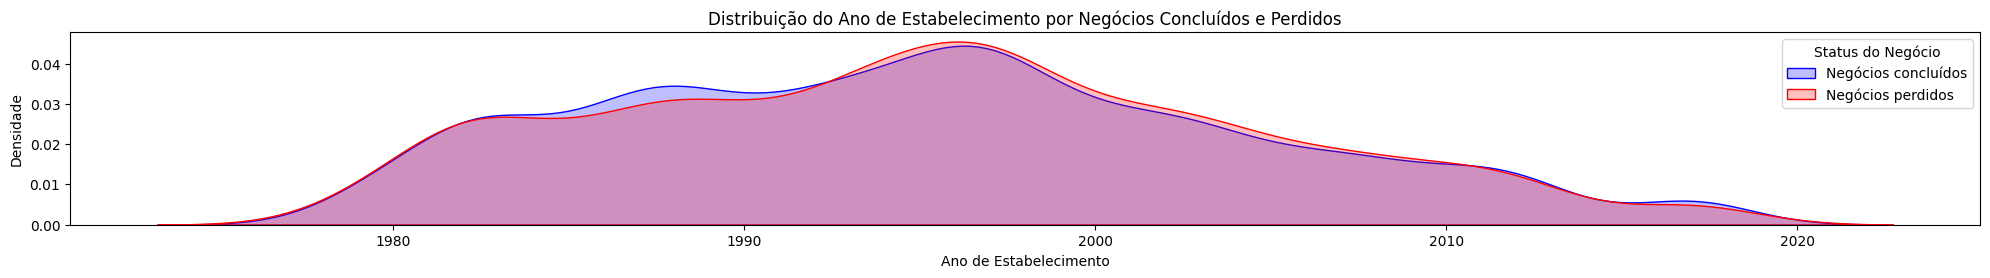

In [15]:
# Exemplo de Gráfico da relação de 'year_established' com deal_stage
plt.figure(figsize=[20, 20])

plt.subplot(811)
sns.kdeplot(base_won['year_established'], label='Negócios concluídos', shade=True, color='b')
sns.kdeplot(base_lost['year_established'], label='Negócios perdidos', shade=True, color='r')

# Adicionando rótulos e título para melhorar a visualização
plt.xlabel('Ano de Estabelecimento')
plt.ylabel('Densidade')
plt.title('Distribuição do Ano de Estabelecimento por Negócios Concluídos e Perdidos')
plt.legend(title='Status do Negócio')

# Melhorando o layout para melhor visualização
plt.tight_layout()

# Exibir o gráfico
plt.show()

Insight: A análise da distribuição do ano de estabelecimento das empresas indica que a maior parte das transações, tanto concluídas quanto perdidas, foi realizada com empresas fundadas a partir da primeira metade dos anos 90. Isso sugere uma oportunidade significativa para direcionar esforços de prospecção a empresas estabelecidas nesse período. No entanto, é importante considerar fatores adicionais, como o setor de atuação e o tamanho das empresas, para segmentar mais precisamente os esforços de vendas e aumentar a taxa de conversão de oportunidades em negócios concluídos.

<ipython-input-16-ced63e84867f>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_won['revenue'], label = 'Negócios concluídos', shade = True, color = 'b')
<ipython-input-16-ced63e84867f>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_lost['revenue'], label = 'Negócios perdidos', shade = True, color = 'r')


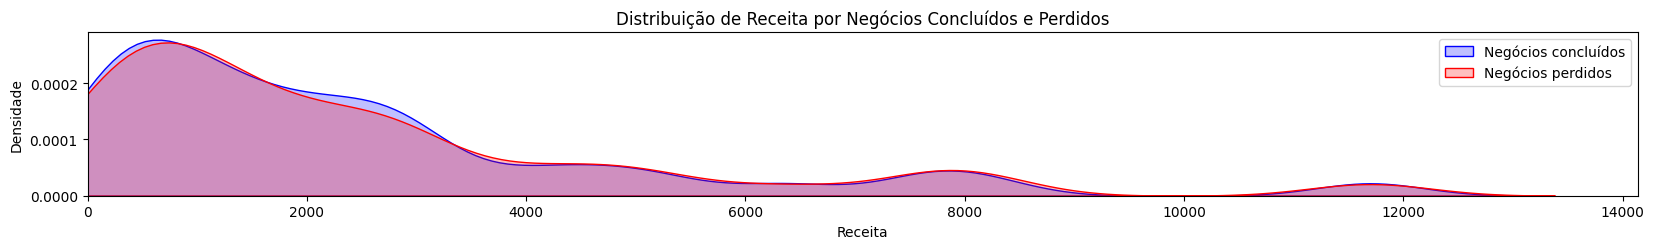

In [16]:
# Exemplo de Gráfico da relação de 'employees' com deal_stage
plt.figure(figsize=[20, 20])

plt.subplot(811)
sns.kdeplot(base_won['revenue'], label = 'Negócios concluídos', shade = True, color = 'b')
sns.kdeplot(base_lost['revenue'], label = 'Negócios perdidos', shade = True, color = 'r')

# Definindo o limite inferior do eixo x para 0
plt.xlim(left=0)

# Adicionando rótulos e título para melhorar a visualização
plt.xlabel('Receita')
plt.ylabel('Densidade')
plt.title('Distribuição de Receita por Negócios Concluídos e Perdidos')
plt.legend()

# Exibir o gráfico
plt.show()

Insight: É evidente que a maior parte de nossas vendas está concentrada em empresas com receita anual entre 1000 e 4000 (milhões de dólares). Essa é uma característica importante a ser considerada ao selecionar empresas para prospecção, destacando a relevância de direcionar esforços de vendas e marketing para esse segmento específico.

<ipython-input-17-6d4705698060>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_won['employees'], label='Negócios concluídos', shade=True, color='b')
<ipython-input-17-6d4705698060>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_lost['employees'], label='Negócios perdidos', shade=True, color='r')


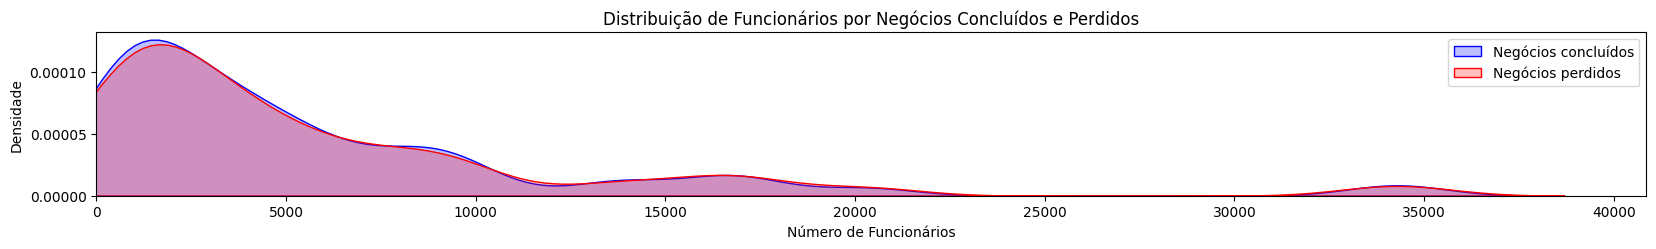

In [17]:
# Exemplo de Gráfico da relação de 'employees' com deal_stage
plt.figure(figsize=[20, 20])

plt.subplot(811)
sns.kdeplot(base_won['employees'], label='Negócios concluídos', shade=True, color='b')
sns.kdeplot(base_lost['employees'], label='Negócios perdidos', shade=True, color='r')

# Definindo o limite inferior do eixo x para 0
plt.xlim(left=0)

# Adicionando rótulos e título para melhorar a visualização
plt.xlabel('Número de Funcionários')
plt.ylabel('Densidade')
plt.title('Distribuição de Funcionários por Negócios Concluídos e Perdidos')
plt.legend()

# Exibir o gráfico
plt.show()

Insight: Notamos que nossa concentração de vendas está em empresas com até 10.000 funcionários. Essa é outra característica importante a ser considerada em nossa estratégia, indicando a necessidade de focar nossos esforços de vendas e marketing nessas empresas de médio porte.

<ipython-input-18-f400a83db3fb>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_won['time_until_close'], label='Negócios concluídos', shade=True, color='b')
<ipython-input-18-f400a83db3fb>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(base_lost['time_until_close'], label='Negócios perdidos', shade=True, color='r')


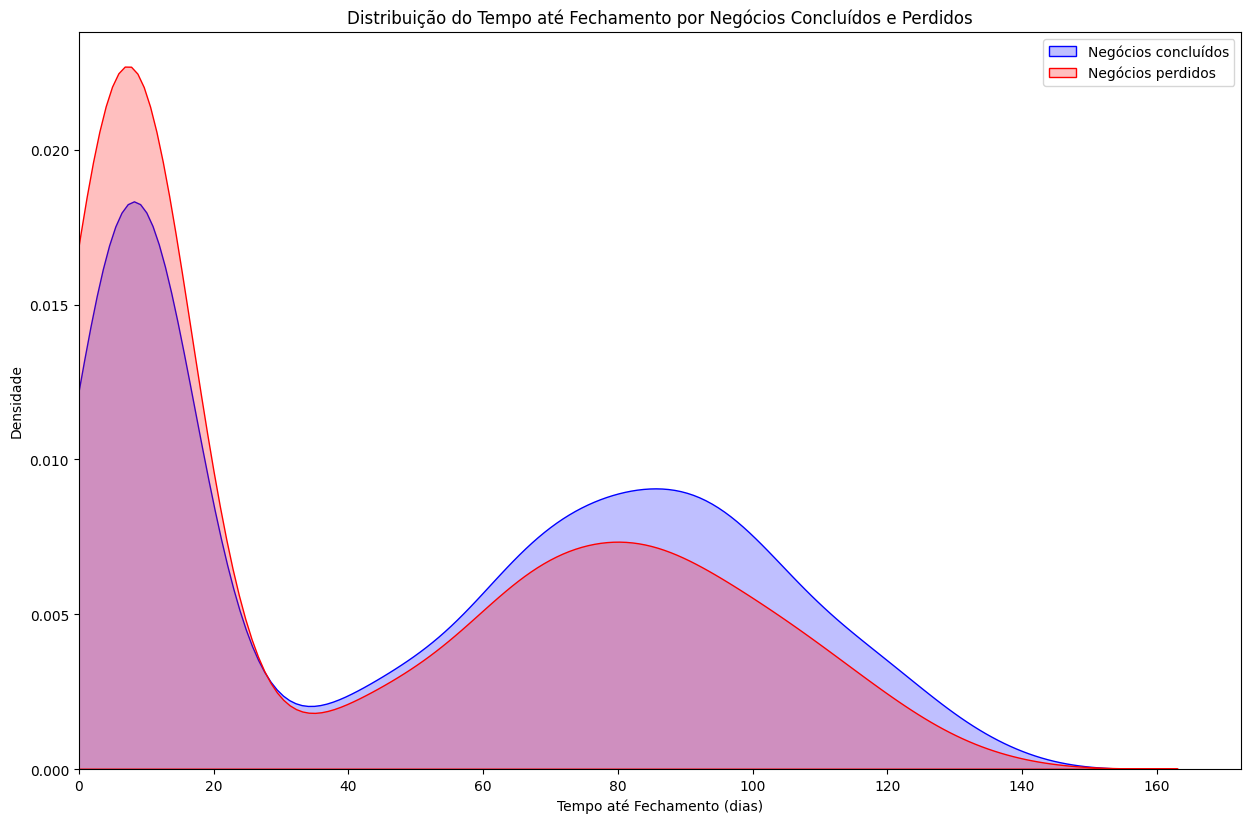

In [18]:
# Exemplo de Gráfico da relação de 'time_until_close' com deal_stage
plt.figure(figsize=[15, 90])

plt.subplot(811)
sns.kdeplot(base_won['time_until_close'], label='Negócios concluídos', shade=True, color='b')
sns.kdeplot(base_lost['time_until_close'], label='Negócios perdidos', shade=True, color='r')

# Definindo o limite inferior do eixo x para 0
plt.xlim(left=0)

# Adicionando rótulos e título para melhorar a visualização
plt.xlabel('Tempo até Fechamento (dias)')
plt.ylabel('Densidade')
plt.title('Distribuição do Tempo até Fechamento por Negócios Concluídos e Perdidos')
plt.legend()

# Exibir o gráfico
plt.show()

Insight: Pode-se perceber que:

- Nos primeiros 20 dias, há uma maior densidade de negócios perdidos em comparação com os concluídos. Isso pode sugerir que, a maioria das oportunidades perdidas são logo no início da negociação.

- Entre 60 e 80 dias, a densidade de negócios concluídos supera a dos negócios perdidos, sugerindo que este período é crucial para a conclusão bem-sucedida dos negócios.

- Negócios que levam entre 20 e 60 dias para serem fechados têm uma distribuição semelhante tanto para negócios concluídos quanto para perdidos, indicando que esse período pode ser crítico para o destino do negócio.

Esses insights podem ser usados para ajustar estratégias de vendas. Por exemplo, esforços adicionais podem ser concentrados nos primeiros 20 dias para reduzir a taxa de perdas iniciais, ou estratégias podem ser desenvolvidas para acelerar o fechamento de negócios entre 60 e 80 dias, onde há uma maior probabilidade de sucesso.

<ipython-input-19-587ee3763805>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Fora dos EUA', 'Nos EUA'])


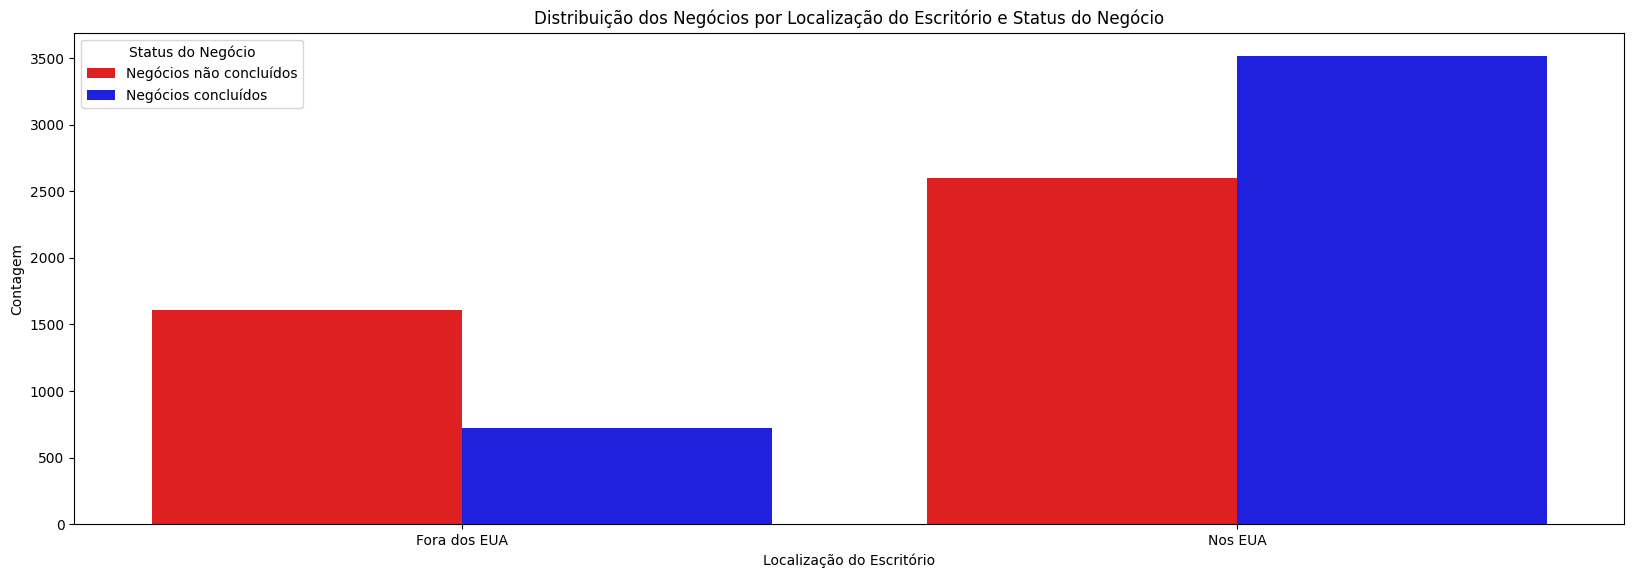

In [19]:
# Exemplo de Gráfico da relação de 'office_location_United States' com deal_stage
plt.figure(figsize=[20, 60])

# Plotagem do gráfico
ax = plt.subplot(811)
sns.countplot(x='office_location_United States', hue='deal_stage_Won', data=base_final_encoded, palette={0: 'red', 1: 'blue'})

# Ajustando os rótulos do eixo x
ax.set_xticklabels(['Fora dos EUA', 'Nos EUA'])

# Ajustando a legenda
handles, labels = ax.get_legend_handles_labels()
labels = ['Negócios não concluídos', 'Negócios concluídos']
ax.legend(handles, labels, title='Status do Negócio')

# Adicionando rótulos e título
plt.xlabel('Localização do Escritório')
plt.ylabel('Contagem')
plt.title('Distribuição dos Negócios por Localização do Escritório e Status do Negócio')

# Exibir o gráfico
plt.show()

Insight: Analisando o gráfico, observamos uma concentração significativa de vendas nos Estados Unidos. No entanto, o mesmo não acontece com os outros mercados, onde a quantidade e eficácia das vendas é mais baixa. Nesse sentido, é crucial avaliar estratégias para expandir nossa presença em outros mercados internacionais. O desempenho das vendas em outros países deve se aproximar do nível dos EUA para beneficiar a empresa.

<ipython-input-20-4a9a2f3c0fed>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Não é Varejo', 'É Varejo'])


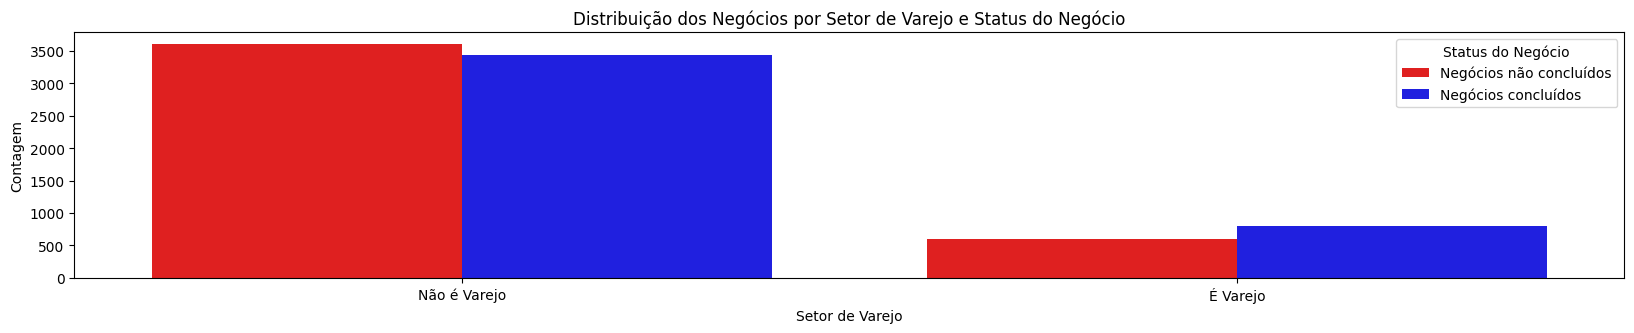

In [20]:
# Exemplo de Gráfico da relação de 'sector_retail' com deal_stage
plt.figure(figsize=[20, 30])

# Plotagem do gráfico
ax = plt.subplot(811)
sns.countplot(x='sector_retail', hue='deal_stage_Won', data=base_final_encoded, palette={0: 'red', 1: 'blue'})

# Ajustando os rótulos do eixo x
ax.set_xticklabels(['Não é Varejo', 'É Varejo'])

# Ajustando a legenda
handles, labels = ax.get_legend_handles_labels()
labels = ['Negócios não concluídos', 'Negócios concluídos']
ax.legend(handles, labels, title='Status do Negócio')

# Adicionando rótulos e título
plt.xlabel('Setor de Varejo')
plt.ylabel('Contagem')
plt.title('Distribuição dos Negócios por Setor de Varejo e Status do Negócio')

# Exibir o gráfico
plt.show()

Insight: O setor varejista (retail) demonstra uma taxa de conversão mais alta em negócios fechados em comparação com negócios não fechados. Isso sugere que o setor varejista pode ser um segmento importante para nossa empresa, mas é igualmente válido analisar outros setores para identificar oportunidades adicionais de negócios e diversificar nossa base de clientes.

### 2- Impacto dos produtos

Vamos aprofundar nossa análise nos produtos, buscando entender melhor seu impacto nos resultados dos negócios. Para isso, vamos investigar as características dos produtos vendidos em negócios bem-sucedidos e mal sucedidos, identificando padrões que possam nos ajudar a entender quais tipos de produtos têm maior probabilidade de resultar em fechamentos positivos.

Vamos examinar variáveis como o valor do produto, a categoria do produto, a região de venda e outras características relevantes que possam influenciar nas decisões de compra dos clientes. Ao analisar esses dados de forma mais detalhada, esperamos obter insights valiosos que possam orientar estratégias futuras de vendas e marketing.

In [21]:
# Calculando as porcentagens dos produtos
porcentagem_total = base_final['product'].value_counts(normalize=True) * 100
porcentagem_won = base_won['product'].value_counts(normalize=True) * 100
porcentagem_lost = base_lost['product'].value_counts(normalize=True) * 100

# Criando um DataFrame para combinar as porcentagens
df_porcentagens = pd.DataFrame({
    'Won (%)': porcentagem_won,
    'Lost (%)': porcentagem_lost
})

# Ordenando o DataFrame por Total (%)
df_porcentagens = df_porcentagens.sort_values(by='Won (%)', ascending=False)

# Exibindo o DataFrame
display(df_porcentagens)

,Won (%),Lost (%)
product,,
GTX Basic,21.590373,21.067529
MG Special,18.711656,17.387788
GTX Pro,17.201510,16.902548
MG Advanced,15.431807,17.387788
GTX Plus Basic,15.408211,16.093813
GTX Plus Pro,11.302501,10.756167
GTK 500,0.353941,0.404367


Insight: Analisando a tabela, conseguimos notar o destaque de 4 produtos que normalmente tem sua venda cocluída mais vezes do que não concluída. São eles: GTX Basic, MG Special, GTX Pro e GTX Plus Pro. Isso significa que investindo mais nesses produtos, a tendencia de conclusão da venda será maior e consequentemente mais vendas seão feitas e será gerado mais lucro.

In [22]:
# Calcular a diferença entre 'sales_price' e 'close_value' para obter o lucro
base_won['diferenca_preco_mercado'] = base_won['close_value'] - base_won['sales_price']

<ipython-input-22-3ee0d19fb0f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_won['diferenca_preco_mercado'] = base_won['close_value'] - base_won['sales_price']


**Importante**: O termo 'diferenca_preco_mercado' em nosso notebook significa a diferença do valor de venda do produto com o valor médio de mercado desse mesmo produto

In [23]:
# Agrupar por 'product' e calcular as métricas desejadas
tabela_lucro_produtos_completa = base_won.groupby('product').agg(
    quantidade_vendida=('product', 'count'),
    valor_medio = ('close_value', 'mean'),
    valor_total_vendas=('close_value', 'sum'),
    media_diferenca_preco_mercado=('diferenca_preco_mercado', 'mean')
).reset_index()

# Ordenar a tabela pelo lucro total em ordem decrescente
tabela_lucro_produtos_completa = tabela_lucro_produtos_completa.sort_values(by='valor_total_vendas', ascending=False)

# Exibir a tabela completa
display(tabela_lucro_produtos_completa)

,product,quantidade_vendida,valor_medio,valor_total_vendas,media_diferenca_preco_mercado
4,GTX Pro,729,4815.607682,3510578.0,-5.392318
3,GTX Plus Pro,479,5489.876827,2629651.0,7.876827
5,MG Advanced,654,3388.970948,2216387.0,-4.029052
2,GTX Plus Basic,653,1080.053599,705275.0,-15.946401
1,GTX Basic,915,545.642623,499263.0,-4.357377
0,GTK 500,15,26707.466667,400612.0,-60.533333
6,MG Special,793,55.192938,43768.0,0.192938


Insight: Nossos principais produtos em questão de valor de venda são: GTX Pro, GTX Plus Pro, MG Advanced. Uma forma de ampliar nossa receita é sempre garantindo a disponibilidade desses produtos para que sempre possamos vendê-los e garantirmos nossa maior concentração de receita.

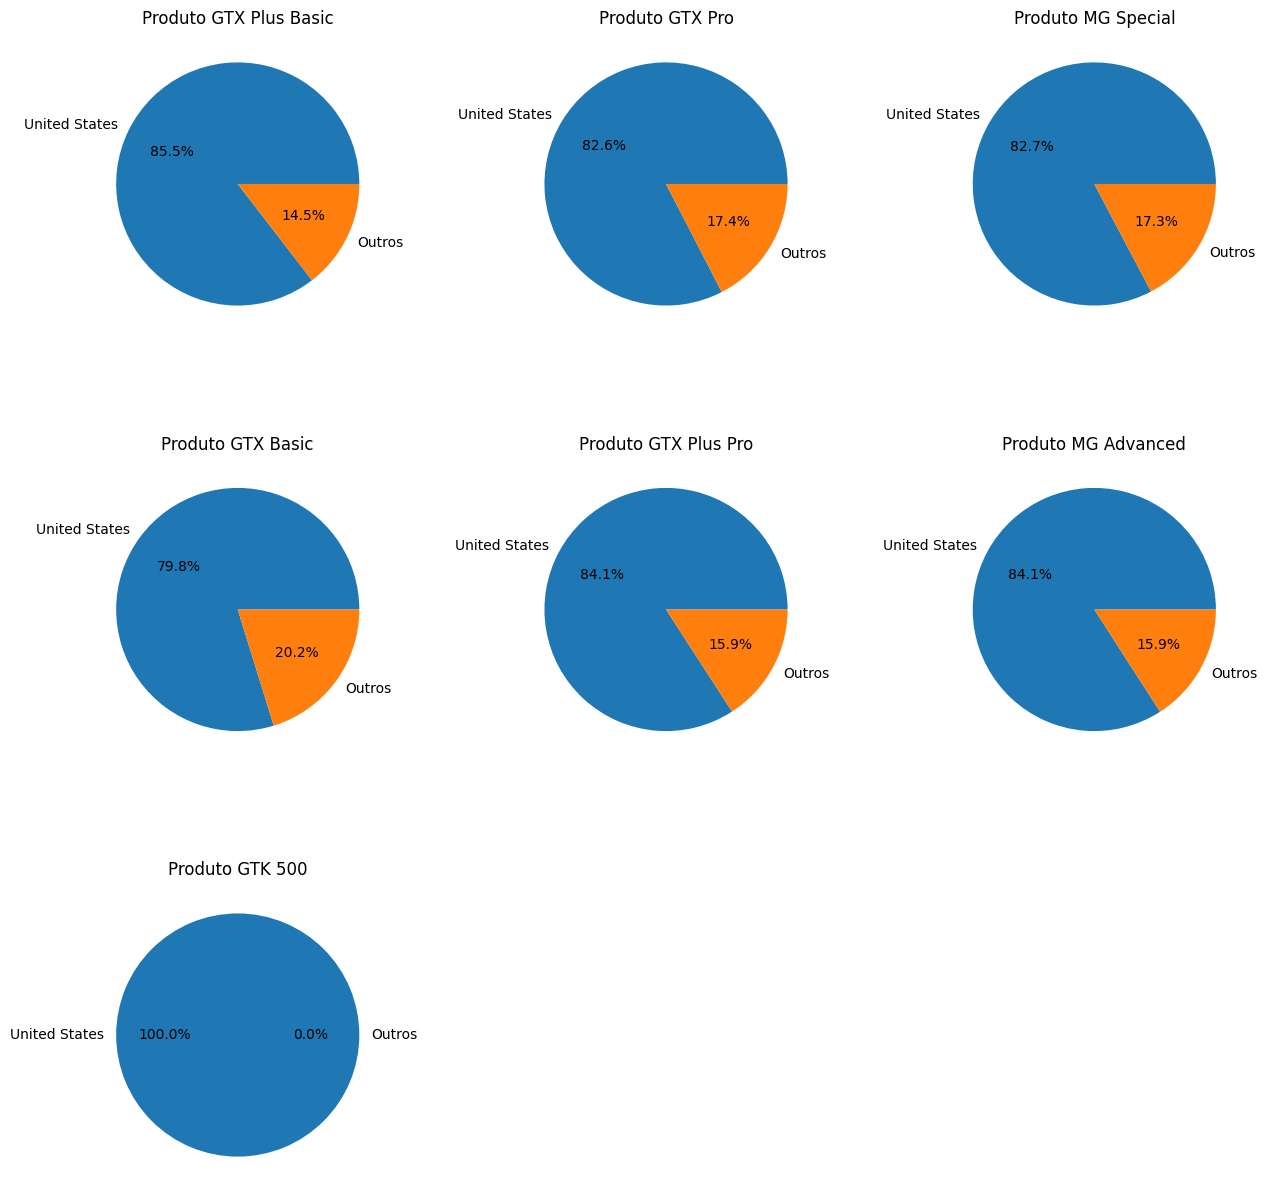

In [24]:
# Supondo que base_won seja seu DataFrame
produtos = base_won['product'].unique()

# Determina o número de linhas e colunas para a subplot grid
num_produtos = len(produtos)
num_cols = 3  # Define o número de colunas desejado
num_rows = (num_produtos + num_cols - 1) // num_cols  # Calcula o número de linhas necessárias

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Ajusta o espaçamento entre os subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for i, produto in enumerate(produtos):
    vendas_produto = base_won[base_won['product'] == produto]
    vendas_por_setor = vendas_produto.groupby('office_location').size()

    # Filtra apenas as localizações dos Estados Unidos
    vendas_usa = vendas_por_setor.loc['United States'] if 'United States' in vendas_por_setor else 0
    vendas_outros = vendas_por_setor.drop('United States').sum()

    ax = axes[i // num_cols, i % num_cols]
    ax.pie([vendas_usa, vendas_outros], labels=['United States', 'Outros'], autopct='%1.1f%%')
    ax.set_title(f'Produto {produto}')

# Remove os subplots vazios se houver
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.show()


Insight: Percebe-se um detaque do produto GTK Basic para o mercado externo aos EUA e uma concentração de 100% do GTK 500 no mercado norte-americano. Isso significa que para conquistar mais esse mercado externo, a propecção feita com o produto GTK Basic tende a gerar mais possibilidades de vendas.

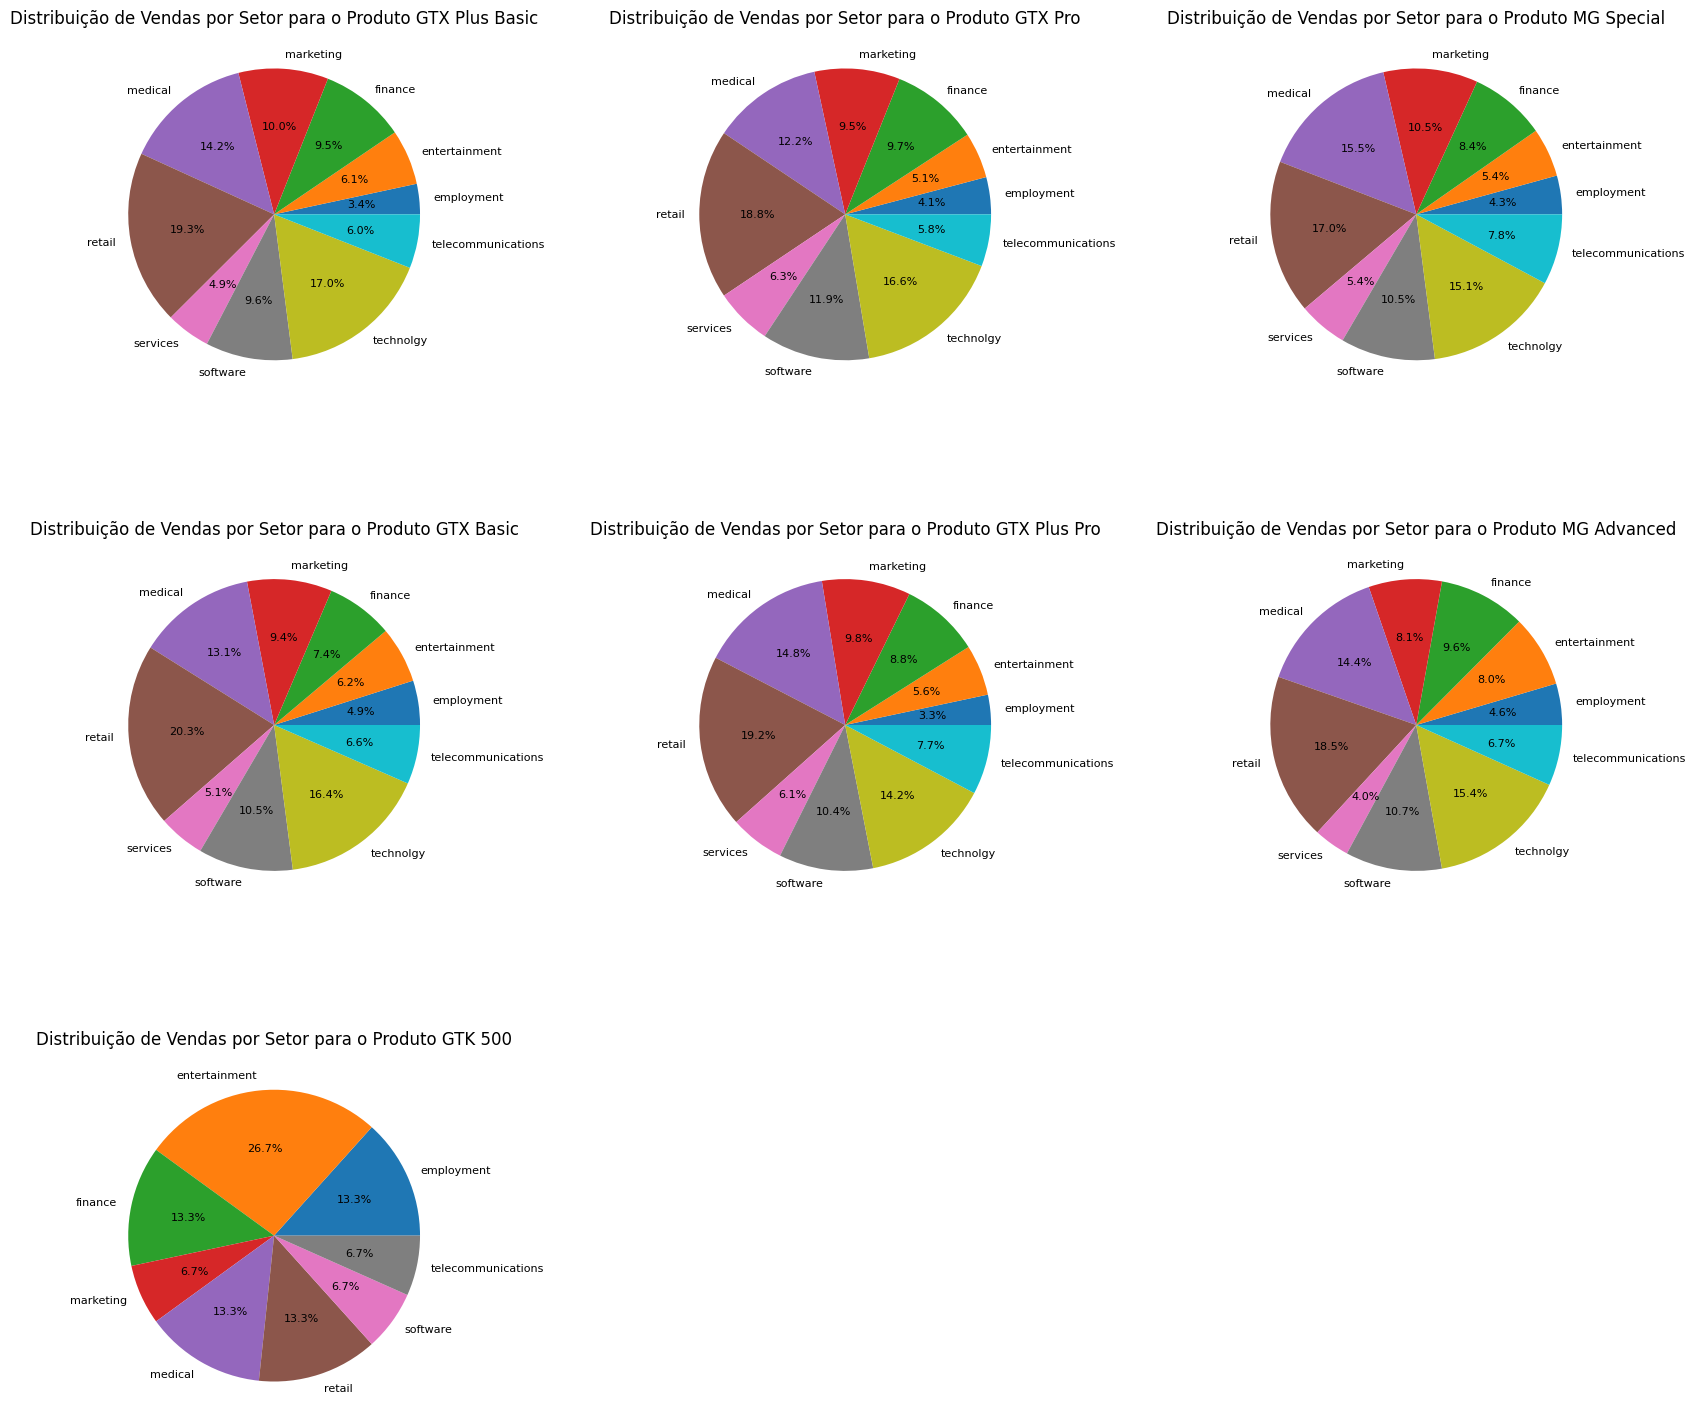

In [25]:
# Supondo que base_final seja seu DataFrame
produtos = base_won['product'].unique()

# Determina o número de linhas e colunas para a grid de subplots
num_produtos = len(produtos)
num_cols = 3  # Define o número de colunas desejado
num_rows = (num_produtos + num_cols - 1) // num_cols  # Calcula o número de linhas necessárias

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 6 * num_rows))

# Ajusta o espaçamento entre os subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for i, produto in enumerate(produtos):
    vendas_produto = base_won[base_won['product'] == produto]
    vendas_por_setor = vendas_produto.groupby('sector').size()

    ax = axes[i // num_cols, i % num_cols]
    ax.pie(vendas_por_setor, labels=vendas_por_setor.index, autopct='%1.1f%%', textprops={'fontsize': 8})
    ax.set_title(f'Distribuição de Vendas por Setor para o Produto {produto}')

# Remove subplots vazios se houver
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

plt.show()


Insight: A análise da distribuição de vendas por setor revela que o setor de varejo e tecnologia são os principais para a maioria dos produtos, indicando um forte mercado nesses segmentos. Produtos como o GTX Plus Basic, GTX Pro, MG Special, GTX Basic, GTX Plus Pro e MG Advanced têm uma distribuição de vendas similar, com o varejo e tecnologia liderando. Por outro lado, o produto GTK 500 tem uma distribuição de vendas distinta, com uma alta concentração no setor de entretenimento. Esse padrão sugere a necessidade de estratégias de vendas diferenciadas para o GTK 500, enquanto os demais produtos podem se beneficiar de um foco contínuo nos setores de varejo e tecnologia.

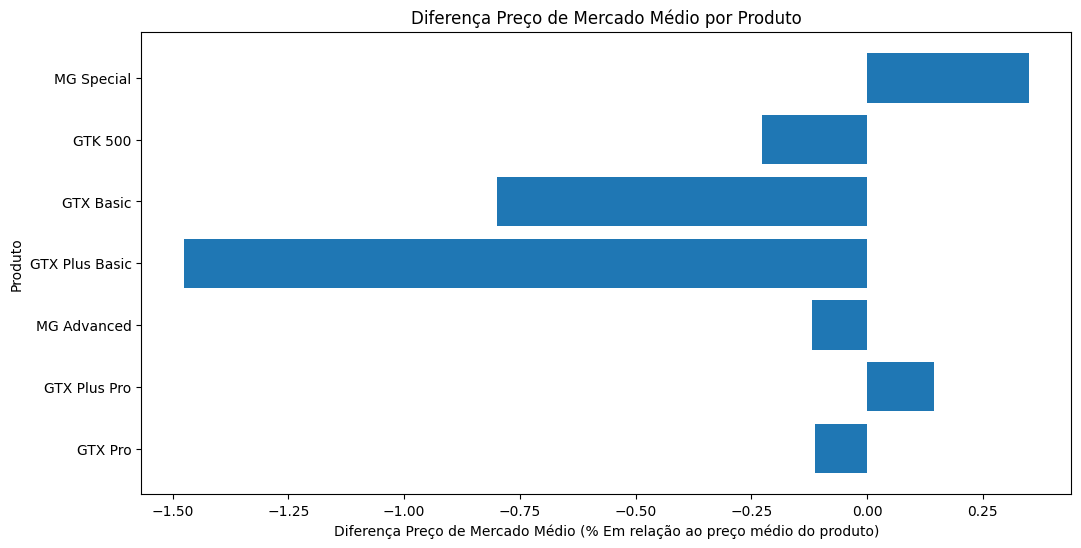

In [26]:
# Gráfico de Lucro Médio por produto
plt.figure(figsize=(12, 6))

# Corrigir a expressão de divisão
plt.barh(
    tabela_lucro_produtos_completa['product'],
    (tabela_lucro_produtos_completa['media_diferenca_preco_mercado'] / tabela_lucro_produtos_completa['valor_medio']) * 100
)

plt.xlabel('Diferença Preço de Mercado Médio (% Em relação ao preço médio do produto)')
plt.ylabel('Produto')
plt.title('Diferença Preço de Mercado Médio por Produto')
plt.show()


Insight: Atenção aos Produtos com Prejuízo: GTX Plus Basic e GTX Basic estão sendo vendidos com o preço abaixo do seu valor de mercado. Pode ser necessário revisar estratégias de precificação e marketing.

Análise de Causas: Para produtos com lucro negativo, é importante analisar as causas. Pode ser devido a altos custos de produção, baixa aceitação no mercado, ou problemas de distribuição.

### 3- Desempenho das equipes de vendas

Vamos aprofundar nossa análise na equipe de vendas para entender melhor seu desempenho e sua influência nos resultados dos negócios. Vamos examinar variáveis como o tempo médio de fechamento de negócios, o número de negócios fechados, a distribuição geográfica das vendas realizadas pela equipe, entre outras métricas relevantes.

Ao analisar esses dados, buscamos identificar padrões que possam indicar quais membros da equipe têm um desempenho mais consistente e quais áreas geográficas ou segmentos de clientes estão respondendo melhor às estratégias de vendas. Esses insights podem nos ajudar a otimizar a alocação de recursos e a desenvolver estratégias mais eficazes para aumentar as vendas e melhorar o desempenho da equipe como um todo.









In [27]:
# Agrupar por 'sales_agent' e calcular as métricas desejadas
vendas_por_agente = base_won.groupby('sales_agent').agg(
    quantidade_vendida=('product', 'count'),
    valor_total_vendas=('close_value', 'sum'),
    tempo_medio_fechamento=('time_until_close', 'mean'),
    diferenca_preco_mercado_total=('diferenca_preco_mercado', 'sum'),
    lucro_por_produto=('diferenca_preco_mercado', 'mean')
).reset_index()

# Calcular a coluna lucro_por_tempo após a agregação
vendas_por_agente['diferenca_preco_mercado_por_tempo'] = vendas_por_agente['diferenca_preco_mercado_total'] / vendas_por_agente['tempo_medio_fechamento']

# Calcular a proporção de oportunidades ganhas pelo número total de oportunidades
vendas_por_agente['proporcao_ganhos'] = vendas_por_agente['quantidade_vendida'] / base_final.groupby('sales_agent')['product'].count().reset_index()['product']

# Ordenar a tabela pelo valor total das vendas em ordem decrescente
vendas_por_agente = vendas_por_agente.sort_values(by='valor_total_vendas', ascending=False)

# Exibir a tabela resultante
display(vendas_por_agente)


,sales_agent,quantidade_vendida,valor_total_vendas,tempo_medio_fechamento,diferenca_preco_mercado_total,lucro_por_produto,diferenca_preco_mercado_por_tempo,proporcao_ganhos
6,Darcel Schlecht,349,1153214.0,49.426934,-3916.0,-11.220630,-79.228058,0.532012
26,Vicki Laflamme,221,478396.0,53.556561,-2694.0,-12.190045,-50.301960,0.494407
15,Kary Hendrixson,209,454298.0,52.966507,-2561.0,-12.253589,-48.351310,0.478261
2,Cassey Cress,163,450489.0,48.785276,-1829.0,-11.220859,-37.490820,0.471098
7,Donn Cantrell,158,445860.0,53.329114,3319.0,21.006329,62.236174,0.574545
22,Reed Clapper,155,438336.0,48.954839,-2539.0,-16.380645,-51.864128,0.654008
29,Zane Levy,161,430068.0,46.925466,3804.0,23.627329,81.064725,0.465318
4,Corliss Cosme,150,421036.0,51.106667,-2335.0,-15.566667,-45.688756,0.483871
12,James Ascencio,135,413533.0,53.355556,540.0,4.000000,10.120783,0.505618
5,Daniell Hammack,114,364229.0,46.587719,5213.0,45.728070,111.896441,0.441860


Insight: Analisando o gráfico percebemos 2 pontos que se destacam. O primeiro é a grande quantidade de vendas do agente Darcel Schlecht, superando consideravelmente os seus colegas. O segundo são os lucros gerados pelo agente Daniel Hammack, superando consideravelmente os seus colegas. Nesse sentido, buscando familiaridades entre os agentes, percebe-se que o tempo médio de venda (em negócios concluídos) desses agentes é inferior a 55 dias, o que é uma clara evidência do sinal que indica que negociações não tão demoradas (acima de 80 dias) aumentam as chances de mais vendas e mais receita. Dessa forma, incentivar os agentes a tentarem concluir o processo de venda em um tempo médio especificado (entre 45 e 55 dias) adequado é extremamente relevante para o aumento da receita da empresa

In [28]:
# Agrupar por 'manager' e calcular as métricas desejadas
vendas_por_gerentes_completa = base_won.groupby('manager').agg(
    quantidade_vendida=('product', 'count'),
    valor_total_vendas=('close_value', 'sum'),
    tempo_medio_fechamento=('time_until_close', 'mean'),
    diferenca_preco_mercado_total=('diferenca_preco_mercado', 'sum'),
    diferenca_preco_mercadopor_produto=('diferenca_preco_mercado', 'mean')
).reset_index()

# Ordenar a tabela pelo lucro total em ordem decrescente
vendas_por_gerentes_completa = vendas_por_gerentes_completa.sort_values(by='valor_total_vendas', ascending=False)

# Calcular a proporção de oportunidades ganhas pelo número total de oportunidades
vendas_por_gerentes_completa['proporcao_ganhos'] = vendas_por_gerentes_completa['quantidade_vendida'] / base_final.groupby('manager')['product'].count().reset_index()['product']

# Exibir a tabela completa
display(vendas_por_gerentes_completa)


,manager,quantidade_vendida,valor_total_vendas,tempo_medio_fechamento,diferenca_preco_mercado_total,diferenca_preco_mercadopor_produto,proporcao_ganhos
3,Melvin Marxen,882,2251930.0,50.829932,3229.0,3.660998,0.507772
5,Summer Sewald,828,1964750.0,51.446860,-12066.0,-14.572464,0.488496
4,Rocco Neubert,691,1960545.0,49.399421,3913.0,5.662808,0.521509
1,Celia Rouche,610,1603897.0,52.360656,-3209.0,-5.260656,0.472868
0,Cara Losch,480,1130049.0,52.414583,-685.0,-1.427083,0.498960
2,Dustin Brinkmann,747,1094363.0,54.602410,-9130.0,-12.222222,0.519110


Insight: Destaque para a equipe do gerente Rocco Neubert, que apresenta uma boa quantidade de vendas, um valor total de vendas elevado e o menor tempo médio de fechamento (49.4 dias). Além disso, a equipe de Rocco tem a maior diferença de preço de mercado por produto positiva (5.66) e a maior proporção de ganhos (52.15%). Esses fatores indicam que a eficiência no tempo de fechamento e uma estratégia de precificação bem ajustada são cruciais para aumentar a receita e a taxa de sucesso nas vendas.

Insight: Percebemos mais uma vez a importância do tempo de negociação. Por meio do gráfico entendemos que são feitas mais vendas quando o tempo de venda está, em média, entre 45 e 55 dias. Essa é uma importante métrica para estimular as equipes de vendas, pois como dito anteriormente, negociações nessa faixa de tempo são mais propensas a serem concluídas.

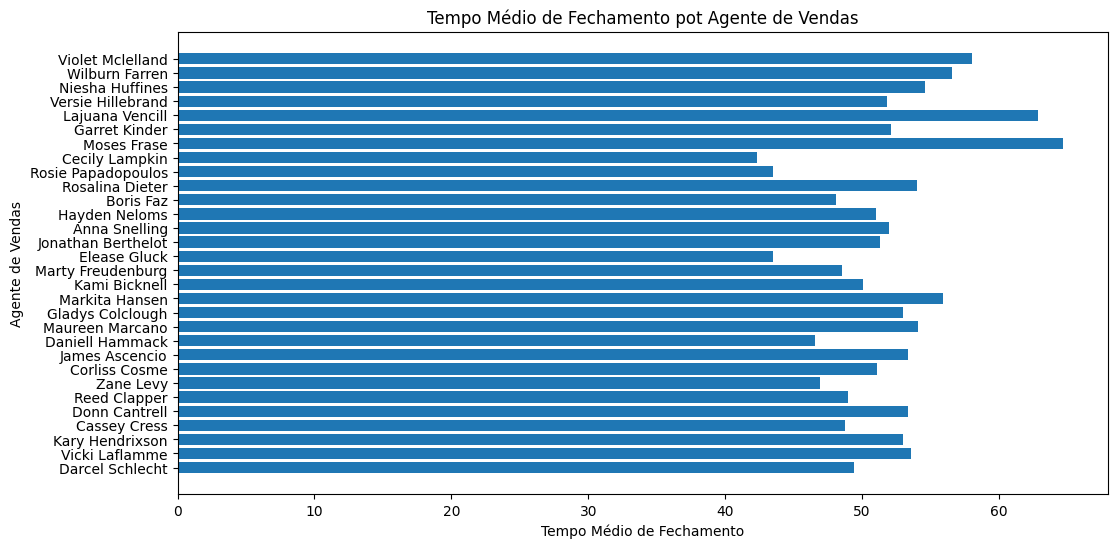

In [29]:
# Gráfico do tempo médio de fechamento do negócio por agente
plt.figure(figsize=(12, 6))
plt.barh(vendas_por_agente['sales_agent'], vendas_por_agente['tempo_medio_fechamento'])
plt.xlabel('Tempo Médio de Fechamento')
plt.ylabel('Agente de Vendas')
plt.title('Tempo Médio de Fechamento pot Agente de Vendas')
plt.show()

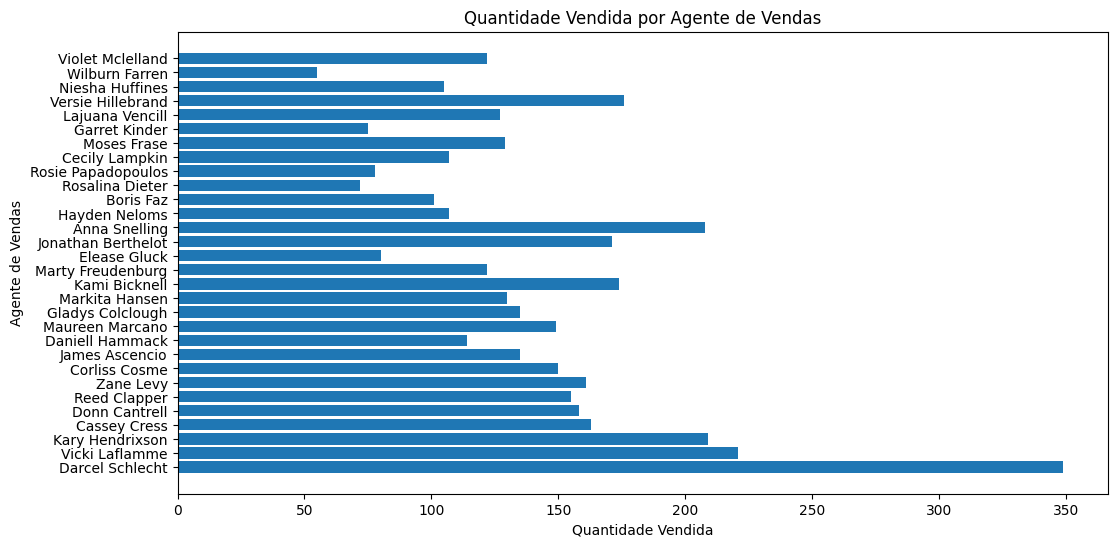

In [30]:
# Gráfico da quantidade vendida por agente
plt.figure(figsize=(12, 6))
plt.barh(vendas_por_agente['sales_agent'], vendas_por_agente['quantidade_vendida'])
plt.xlabel('Quantidade Vendida')
plt.ylabel('Agente de Vendas')
plt.title('Quantidade Vendida por Agente de Vendas')
plt.show()

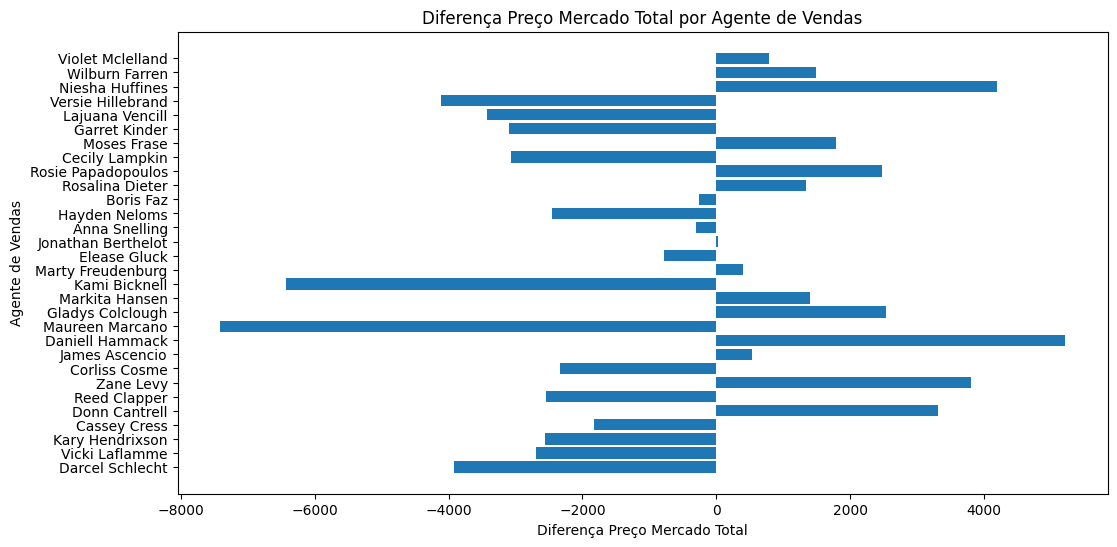

In [31]:
# Gráfico do lucro total por agente
plt.figure(figsize=(12, 6))
plt.barh(vendas_por_agente['sales_agent'], vendas_por_agente['diferenca_preco_mercado_total'])
plt.xlabel('Diferença Preço Mercado Total')
plt.ylabel('Agente de Vendas')
plt.title('Diferença Preço Mercado Total por Agente de Vendas')
plt.show()

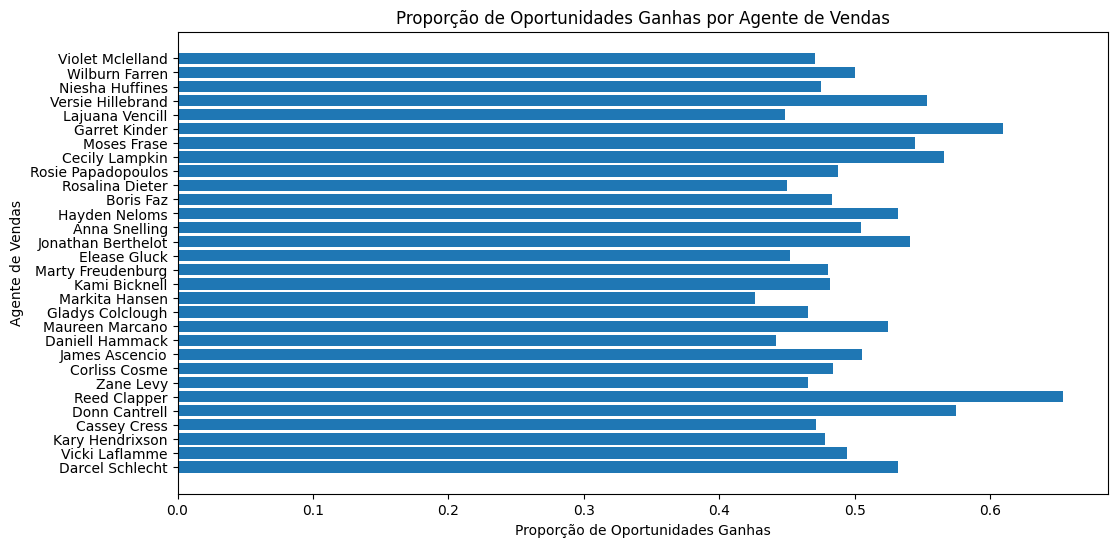

In [32]:
# Gráfico do lucro total por agente
plt.figure(figsize=(12, 6))
plt.barh(vendas_por_agente['sales_agent'], vendas_por_agente['proporcao_ganhos'])
plt.xlabel('Proporção de Oportunidades Ganhas')
plt.ylabel('Agente de Vendas')
plt.title('Proporção de Oportunidades Ganhas por Agente de Vendas')
plt.show()

Insight: Por meio desses 4 gráficos gerados é possível perceber as métricas principais dos agentes de vendas. Uma boa estratégia é premiar os agentes que vendem mais, com uma maior proporção de vendas concluídas, em menos tempo e lucrando bem para estimular os agentes da empresa a seguirem esses processos visando uma bonificação. Consequentemente esses esforços são recompensados e a empresa é favorecida pelo aumento da quantidade das vendas.

### 4- Características dos clientes

Vamos agora realizar uma análise mais detalhada sobre as empresas clientes, buscando compreender melhor seu perfil e como ele influencia nos resultados de vendas. Pretendemos examinar variáveis como o tamanho da empresa (número de funcionários), o setor em que atuam, a localização geográfica, entre outras características relevantes.

Ao analisar esses dados de forma mais aprofundada, esperamos identificar padrões que nos ajudem a entender quais tipos de empresas são mais propensas a fechar negócios e quais características são mais relevantes para o sucesso das vendas. Esses insights podem orientar a equipe de vendas na abordagem aos clientes e na adaptação das estratégias de vendas para atender às necessidades específicas de cada segmento de mercado.

Vamos criar uma função para facilitar a exibição de algumas tabelas.

In [33]:
# Função para agrupar e calcular métricas
def calcular_metricas_agrupadas(df, agrupamento):
    return df.groupby(agrupamento).agg(
        quantidade_vendida=('product', 'count'),
        valor_total_vendas=('close_value', 'sum'),
        tempo_medio_fechamento=('time_until_close', 'mean'),
        diferenca_preco_mercado_total=('diferenca_preco_mercado', 'sum'),
        diferenca_preco_mercado_por_produto=('diferenca_preco_mercado', 'mean')
    ).reset_index().sort_values(by='valor_total_vendas', ascending=False)

In [34]:
# Agrupar por 'revenue'
tabela_revenue = calcular_metricas_agrupadas(base_won, 'revenue')
display(tabela_revenue.head(10))

,revenue,quantidade_vendida,valor_total_vendas,tempo_medio_fechamento,diferenca_preco_mercado_total,diferenca_preco_mercado_por_produto
84,11698.03,115,341455.0,50.756522,-3003.0,-26.113043
82,7708.38,108,269245.0,48.111111,1871.0,17.324074
0,4.54,105,206410.0,58.276190,1006.0,9.580952
73,4269.90,57,198020.0,48.122807,2380.0,41.754386
83,8170.38,111,194957.0,55.756757,-1067.0,-9.612613
68,2952.73,65,182522.0,43.707692,2076.0,31.938462
78,5266.09,65,176751.0,54.446154,5581.0,85.861538
54,2041.73,70,170046.0,55.785714,86.0,1.228571
81,7537.24,48,169357.0,49.562500,-1479.0,-30.812500
70,3178.24,65,164683.0,42.876923,-825.0,-12.692308


Insight: Nota-se uma concentração de vendas em empresas com o faturamento superior a 2000.

In [35]:
# Agrupar por 'employees'
tabela_employees = calcular_metricas_agrupadas(base_won, 'employees')
display(tabela_employees.head(10))

,employees,quantidade_vendida,valor_total_vendas,tempo_medio_fechamento,diferenca_preco_mercado_total,diferenca_preco_mercado_por_produto
84,34288.0,115,341455.0,50.756522,-3003.0,-26.113043
77,13756.0,108,269245.0,48.111111,1871.0,17.324074
0,9.0,105,206410.0,58.276190,1006.0,9.580952
65,6472.0,57,198020.0,48.122807,2380.0,41.754386
79,16499.0,111,194957.0,55.756757,-1067.0,-9.612613
58,5107.0,65,182522.0,43.707692,2076.0,31.938462
70,8595.0,65,176751.0,54.446154,5581.0,85.861538
61,5276.0,70,170046.0,55.785714,86.0,1.228571
83,20293.0,48,169357.0,49.562500,-1479.0,-30.812500
56,4540.0,65,164683.0,42.876923,-825.0,-12.692308


Insight: Nota-se uma concentração de vendas em empresas com o numero de funcionarios superior entre 5000 e 15000.

In [36]:
# Agrupar por 'account'
tabela_account = calcular_metricas_agrupadas(base_won, 'account')
display(tabela_account.head(16))

,account,quantidade_vendida,valor_total_vendas,tempo_medio_fechamento,diferenca_preco_mercado_total,diferenca_preco_mercado_por_produto
40,Kan-code,115,341455.0,50.756522,-3003.0,-26.113043
42,Konex,108,269245.0,48.111111,1871.0,17.324074
11,Condax,105,206410.0,58.276190,1006.0,9.580952
9,Cheers,57,198020.0,48.122807,2380.0,41.754386
34,Hottechi,111,194957.0,55.756757,-1067.0,-9.612613
30,Goodsilron,65,182522.0,43.707692,2076.0,31.938462
71,Treequote,65,176751.0,54.446154,5581.0,85.861538
74,Warephase,70,170046.0,55.785714,86.0,1.228571
75,Xx-holding,48,169357.0,49.562500,-1479.0,-30.812500
37,Isdom,65,164683.0,42.876923,-825.0,-12.692308


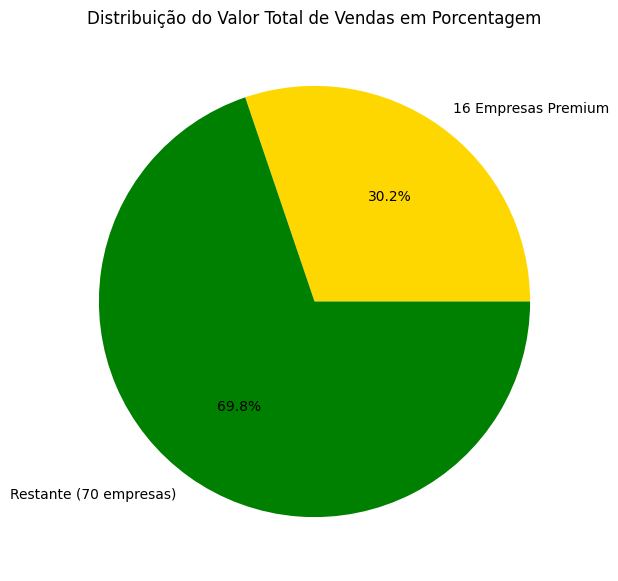

In [37]:
# Calcular o total de vendas para cada empresa
total_vendas_por_empresa = tabela_account.groupby('account')['valor_total_vendas'].sum().reset_index()

# Identificar as 16 empresas que mais geram valor
top_16_empresas = total_vendas_por_empresa.nlargest(16, 'valor_total_vendas')

# Calcular o total de vendas das 16 empresas e o total de vendas das demais empresas
total_vendas_top_16 = top_16_empresas['valor_total_vendas'].sum()
total_vendas_resto = total_vendas_por_empresa[~total_vendas_por_empresa['account'].isin(top_16_empresas['account'])]['valor_total_vendas'].sum()

# Calcular a porcentagem de vendas das 16 empresas e do restante
percentual_top_16 = (total_vendas_top_16 / total_vendas_por_empresa['valor_total_vendas'].sum()) * 100
percentual_resto = (total_vendas_resto / total_vendas_por_empresa['valor_total_vendas'].sum()) * 100

# Criar um DataFrame com os valores em porcentagem
data_plot = {'Grupo': ['16 Empresas Premium', 'Restante (70 empresas)'],
             'Percentual de Vendas': [percentual_top_16, percentual_resto]}
df_plot = pd.DataFrame(data_plot)

# Gerar o gráfico de pizza
plt.figure(figsize=(8, 7))
plt.pie(df_plot['Percentual de Vendas'], labels=df_plot['Grupo'], autopct='%1.1f%%', colors=['gold', 'green'])
plt.title('Distribuição do Valor Total de Vendas em Porcentagem')
plt.show()


Insight: Analisando a distribuição do valor total de vendas, observamos que 16 empresas 'premium' representam 30,2% da receita total da empresa, cada uma com valores de venda acima de 150 mil dólares. Esse dado destaca a importância de manter um relacionamento forte e estratégias de fidelização com essas empresas, já que elas contribuem significativamente para a geração de receita e têm alto valor agregado nas negociações.

In [38]:
# Agrupar por 'sector'
tabela_sector = calcular_metricas_agrupadas(base_won, 'sector')
display(tabela_sector.head(10))

,sector,quantidade_vendida,valor_total_vendas,tempo_medio_fechamento,diferenca_preco_mercado_total,diferenca_preco_mercado_por_produto
5,retail,799,1867528.0,51.553191,-9203.0,-11.518148
8,technolgy,671,1515487.0,51.673621,5921.0,8.824143
4,medical,592,1359595.0,51.724662,-5867.0,-9.910473
7,software,450,1077934.0,53.040000,-6284.0,-13.964444
2,finance,375,950908.0,52.109333,2041.0,5.442667
3,marketing,404,922321.0,49.128713,2316.0,5.732673
1,entertainment,260,689007.0,50.880769,1553.0,5.973077
9,telecommunications,285,653574.0,53.912281,-6956.0,-24.407018
6,services,223,533006.0,52.246637,757.0,3.394619
0,employment,179,436174.0,52.877095,-2226.0,-12.435754


Insight: Percebemos novamente o destaque dos setores retail, technology e medical. Isso é ideal para a aquisição de carcaterísticas importantes para um perfil 'ideal' de empresa que estamos buscando para fechar vendas.

In [39]:
# Agrupar por 'year_established'
tabela_year_established = calcular_metricas_agrupadas(base_won, 'year_established')
display(tabela_year_established.head(15))

,year_established,quantidade_vendida,valor_total_vendas,tempo_medio_fechamento,diferenca_preco_mercado_total,diferenca_preco_mercado_por_produto
2,1982.0,228,587445.0,52.210526,-6664.0,-29.228070
17,1997.0,249,542181.0,54.586345,-286.0,-1.148594
13,1993.0,167,535813.0,50.167665,3992.0,23.904192
16,1996.0,201,504444.0,52.860697,1575.0,7.835821
15,1995.0,187,439359.0,55.486631,2717.0,14.529412
8,1988.0,185,421783.0,55.675676,-552.0,-2.983784
18,1998.0,173,392523.0,53.306358,-332.0,-1.919075
23,2003.0,131,360586.0,50.687023,5929.0,45.259542
20,2000.0,138,358139.0,46.869565,-1316.0,-9.536232
7,1987.0,176,357591.0,51.028409,2947.0,16.744318


Insight:  Percebemos uma grande concentração de vendas em empresas com fundadas após 1990. Essa é uma importante característica para traçarmos nosso perfil ideal de empresa para estratégias de marketing e prospecção.

OBS: O ano da empresa com mais vendas é abaixo de 1990 mas temos que avaliar o geral e não somente esse caso específico

In [40]:
# Agrupar por 'office_location'
tabela_office_location = calcular_metricas_agrupadas(base_won, 'office_location')
display(tabela_office_location.head(15))

,office_location,quantidade_vendida,valor_total_vendas,tempo_medio_fechamento,diferenca_preco_mercado_total,diferenca_preco_mercado_por_produto
14,United States,3514,8426955.0,51.846898,-1351.0,-0.384462
8,Korea,111,194957.0,55.756757,-1067.0,-9.612613
6,Jordan,52,163339.0,49.403846,-4479.0,-86.134615
10,Panama,75,151777.0,59.693333,357.0,4.760000
5,Japan,46,123506.0,55.739130,-1330.0,-28.913043
0,Belgium,63,117463.0,59.507937,-3285.0,-52.142857
9,Norway,50,115712.0,53.940000,-1709.0,-34.180000
4,Italy,54,114352.0,45.759259,-4011.0,-74.277778
7,Kenya,53,107408.0,42.094340,-982.0,-18.528302
12,Poland,45,106754.0,40.311111,-2156.0,-47.911111


Insight: Percebemos uma grande concentração do faturamento e das vendas em empresas dos EUA. O Brasil se destaca pelo maior diferença de preço de mercado por produto, representando uma boa localização para ser explorada em estratégias de marketing mais direcionadas.

In [41]:
# Agrupar por 'subsidiary_of'
tabela_subsidiary_of = calcular_metricas_agrupadas(base_won, 'subsidiary_of')
display(tabela_subsidiary_of.head(10))

,subsidiary_of,quantidade_vendida,valor_total_vendas,tempo_medio_fechamento,diferenca_preco_mercado_total,diferenca_preco_mercado_por_produto
0,0,3500,8273453.0,51.426286,-39588.0,-11.310857
1,Acme Corporation,180,417605.0,56.016667,2342.0,13.011111
6,Sonron,164,375355.0,54.780488,2543.0,15.506098
2,Bubba Gump,110,240661.0,49.072727,1520.0,13.818182
3,Golddex,93,238583.0,54.688172,5063.0,54.440860
4,Inity,102,198754.0,53.480392,4919.0,48.225490
5,Massive Dynamic,57,198020.0,48.122807,2380.0,41.754386
7,Warephase,32,63103.0,53.468750,2873.0,89.781250


Insight: Percebemos que só existem 7 tipos de empresas Holdings informadas em nossa base de dados. Sendo assim, é importante traçar estratégias de prospecção nas empresas subsidiárias dessas empresas informadas, principalmente das que concentram mais vendas e faturamento como Acme e Sonron.

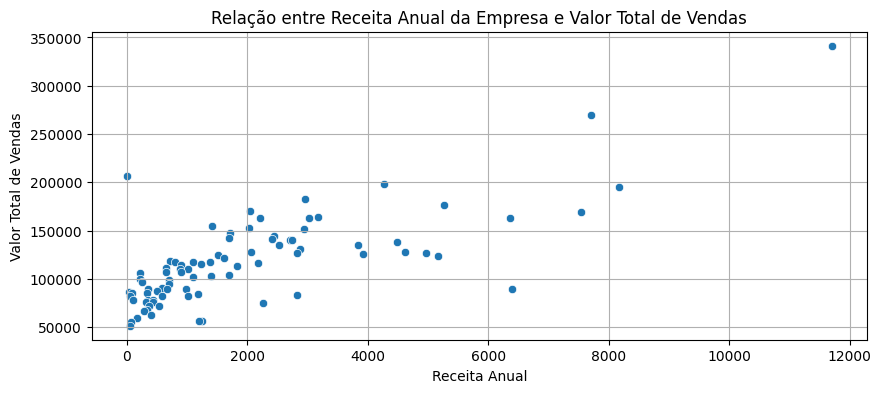

In [42]:
# Criar gráfico de dispersão
plt.figure(figsize=(10, 4))
sns.scatterplot(data=tabela_revenue, x='revenue', y='valor_total_vendas')

# Adicionar título e rótulos aos eixos
plt.title('Relação entre Receita Anual da Empresa e Valor Total de Vendas')
plt.xlabel('Receita Anual')
plt.ylabel('Valor Total de Vendas')
plt.grid(True)

# Mostrar o gráfico
plt.show()

Insight: Percebemos uma grande concentração de vendas em empresas com com receita anual até 10000. Essa é uma importante característica para traçarmos nosso perfil ideal de empresa para estratégias de marketing e prospecção e também é importante verificarmos as causas para empresas de faturamento maiores não estarem fechando tantos negócios com a nossa empresa

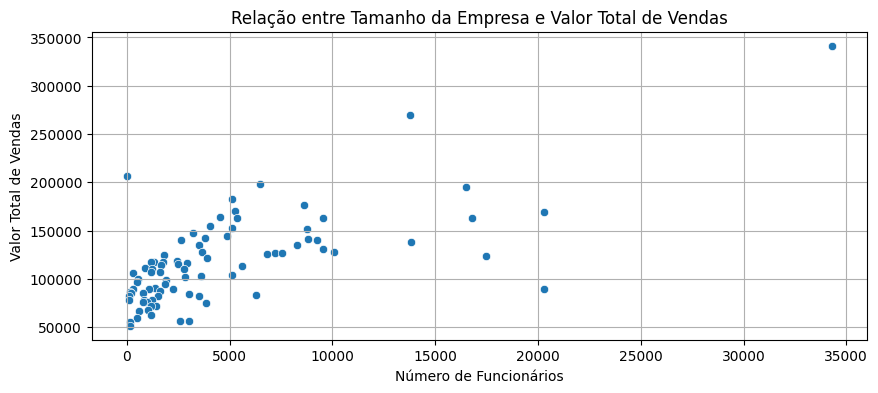

In [43]:
# Criar gráfico de dispersão
plt.figure(figsize=(10, 4))
sns.scatterplot(data=tabela_employees, x='employees', y='valor_total_vendas')

# Adicionar título e rótulos aos eixos
plt.title('Relação entre Tamanho da Empresa e Valor Total de Vendas')
plt.xlabel('Número de Funcionários')
plt.ylabel('Valor Total de Vendas')
plt.grid(True)

# Mostrar o gráfico
plt.show()

Insight: Percebemos uma grande concentração de vendas em empresas com até 10000 funcionários. Essa é uma importante característica para traçarmos nosso perfil ideal de empresa para estratégias de marketing e prospecção.

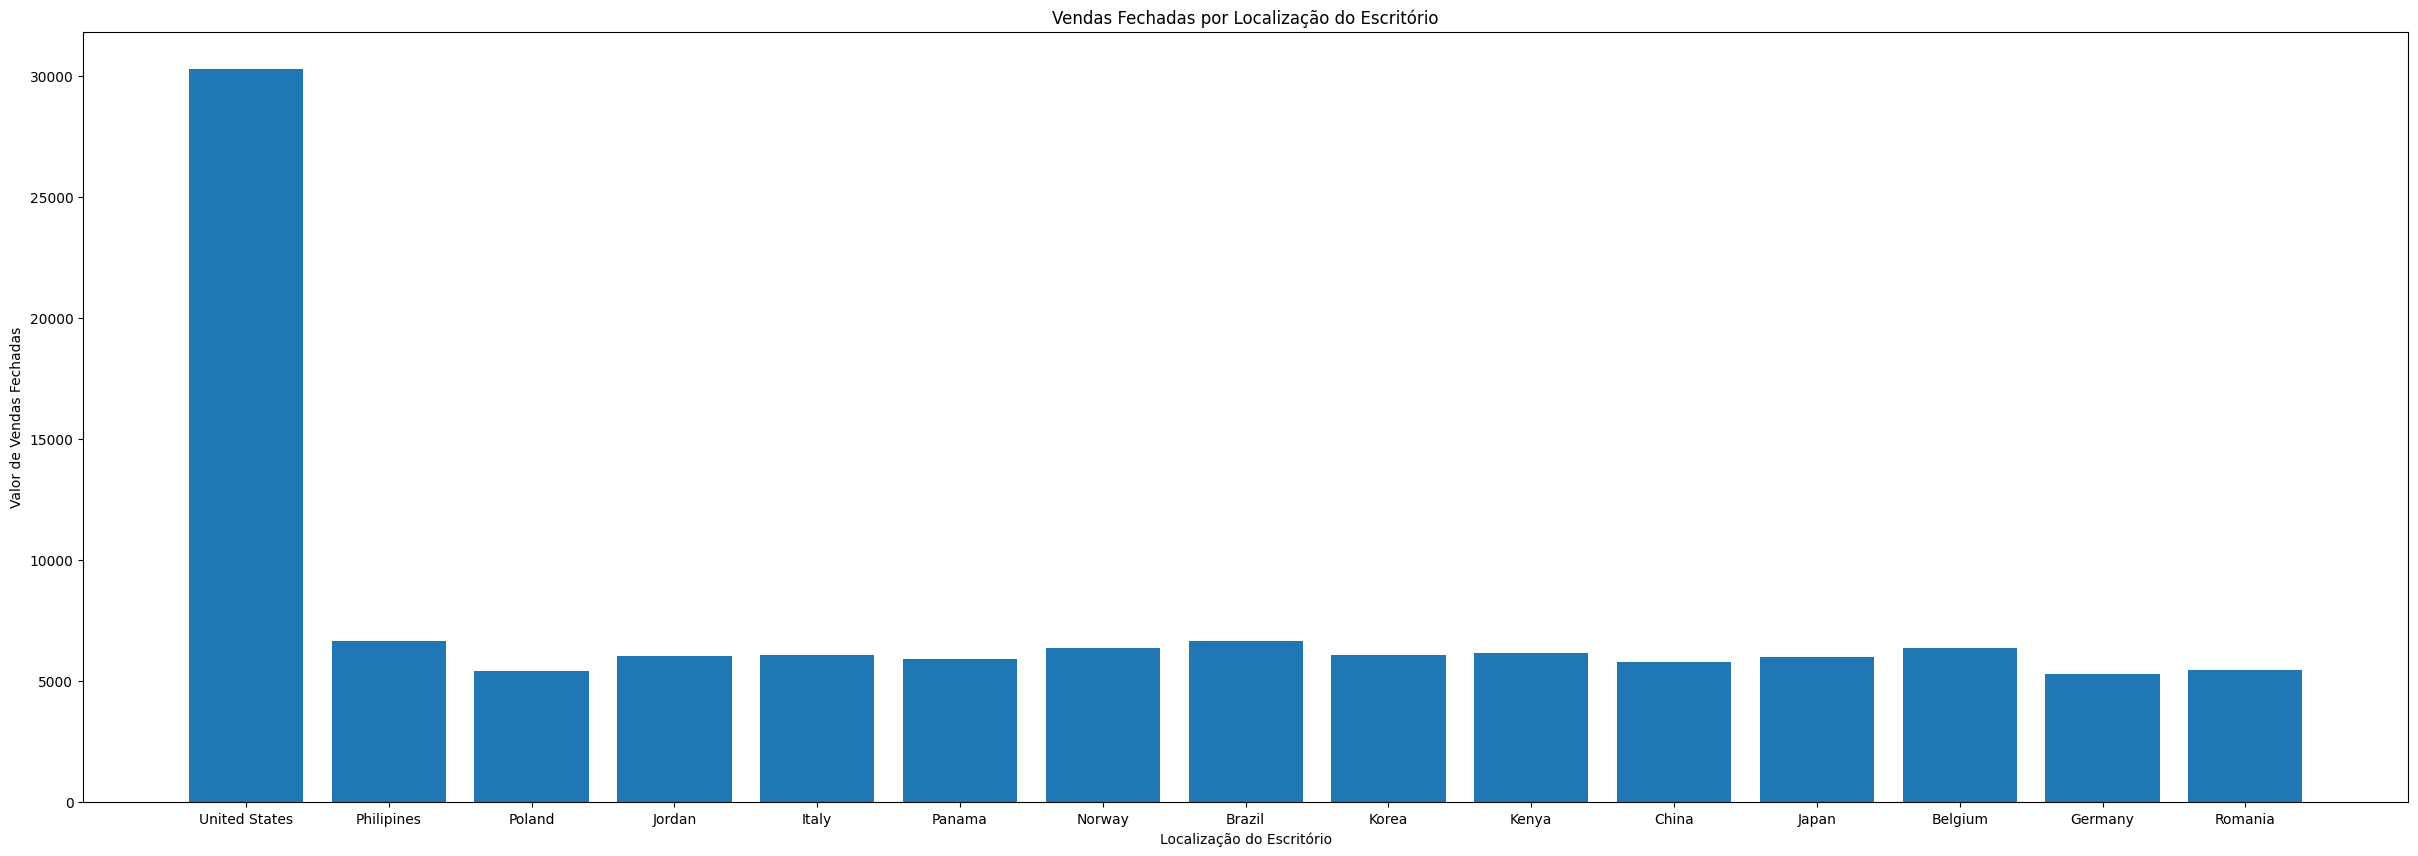

In [44]:
# Gráfico da distribuição de vendas ao redor do globo
plt.figure(figsize=(30, 10))
plt.bar(base_won['office_location'], base_won['close_value'])
plt.xlabel('Localização do Escritório')
plt.ylabel('Valor de Vendas Fechadas')
plt.title('Vendas Fechadas por Localização do Escritório')
plt.show()

<ipython-input-45-2cfd9a303916>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_won['regiao'] = base_won['office_location'].apply(classificar_localizacao)


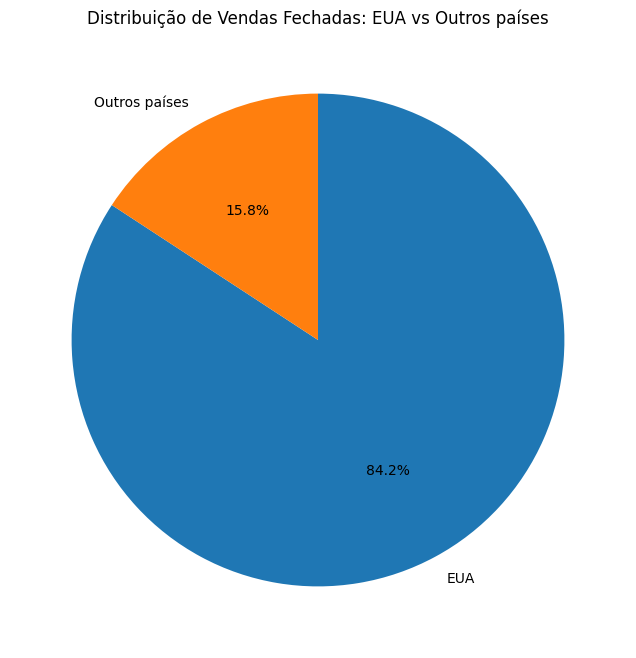

In [45]:
# Criando uma função para classificar os locais como 'EUA' ou 'Outros'
def classificar_localizacao(location):
    if 'USA' in location or 'United States' in location or 'EUA' in location:
        return 'EUA'
    else:
        return 'Outros países'

# Aplicando a função na coluna 'office_location' para criar uma nova coluna 'regiao'
base_won['regiao'] = base_won['office_location'].apply(classificar_localizacao)

# Calculando o valor total de vendas fechadas por região
vendas_por_regiao = base_won.groupby('regiao')['close_value'].sum()

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(vendas_por_regiao, labels=vendas_por_regiao.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Distribuição de Vendas Fechadas: EUA vs Outros países')
plt.show()


Insight: Percebemos mais uma vez a grande concentração de vendas nos EUA. Como dito anteriormente, devemos buscar formas de expandir o nosso mercado internacional. Uma boa medida é por exemplo verificando quais setores são mais vendidos em cada país e focar em uma prospecção mais específica visando esses produtos específicos em cada país.

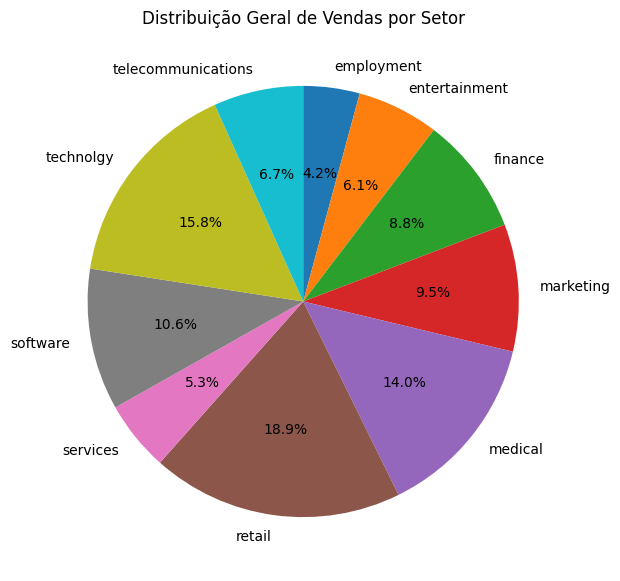

In [46]:
# Contando o número de produtos vendidos por setor
produtos_por_setor = base_won.groupby('sector')['product'].count()

# Criando o gráfico de pizza
plt.figure(figsize=(8, 7))
plt.pie(produtos_por_setor, labels=produtos_por_setor.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Distribuição Geral de Vendas por Setor')
plt.show()

Insight: A análise da distribuição geral de vendas por setor destaca que os setores de varejo, tecnologia e médico representam quase metade das vendas (49%). Esse padrão indica uma oportunidade significativa para concentrar esforços de prospecção nesses setores, visando uma abordagem mais assertiva e eficiente para impulsionar as vendas

## Relatório Final

Com base em uma análise detalhada dos dados de vendas, estamos prontos para apresentar um relatório final que fornecerá insights valiosos para orientar as decisões estratégicas da empresa. Este relatório destaca os principais pontos relacionados aos agentes de vendas, produtos, setores, localizações de escritórios e tendências ao longo do tempo. Nosso objetivo é aumentar as vendas e a receita da TechSales, focando em estratégias que mantenham e aprimorem os pontos fortes existentes, reduzam o número de negócios não concluídos e convertam mais prospecções em vendas efetivas.

Para alcançar esses objetivos, vamos analisar as principais características dos nossos produtos e equipes de vendas, traçando perfis ideais de clientes e empresas para concentrar nossos esforços de prospecção e atendimento de demandas. Ao implementar essas estratégias, esperamos garantir um crescimento sustentável e significativo para a TechSales, posicionando a empresa de maneira competitiva e eficaz no mercado.


## Produtos

### Insight: Produtos GTX Basic, MG Special, GTX Pro e GTX Plus Pro

**Proposta Recomendada:** Focar nos produtos com maior taxa de conclusão de vendas.

- **Ação:** Realizar uma análise detalhada dos produtos GTX Basic, MG Special, GTX Pro e GTX Plus Pro para identificar os fatores que contribuem para suas altas taxas de conclusão de vendas. Essa análise deve considerar aspectos como estratégias de marketing utilizadas, canais de vendas mais efetivos, características dos produtos que mais atraem os clientes e feedbacks positivos recebidos.

- **Estratégia:** Utilizar os insights obtidos dessa análise para replicar as estratégias de sucesso nos produtos com desempenho inferior. Além disso, coletar e utilizar feedback contínuo dos clientes para aprimorar ainda mais esses produtos, garantindo que se mantenham atrativos e competitivos no mercado. Implementar um ciclo de melhoria contínua baseado nas necessidades e preferências dos clientes pode resultar em um aumento significativo nas vendas e, consequentemente, na receita da empresa.

### Insight: Disponibilidade dos Produtos GTX Pro, GTX Plus Pro, e MG Advanced

**Proposta Recomendada:** Garantir a disponibilidade constante dos principais produtos (em unidades vendidas).

- **Ação:** Trabalhar em estreita colaboração com a equipe de supply chain para otimizar a logística e garantir que os produtos GTX Pro, GTX Plus Pro e MG Advanced estejam sempre disponíveis em estoque. Isso pode incluir a revisão dos processos de gestão de inventário, a implementação de sistemas automatizados de reabastecimento e a melhoria da comunicação entre os departamentos de vendas e operações.

- **Estratégia:** Desenvolver e implementar modelos avançados de previsão de demanda para antecipar as necessidades de estoque e evitar rupturas que possam impactar negativamente as vendas. Além disso, estabelecer parcerias estratégicas com fornecedores confiáveis para assegurar a entrega rápida e eficiente dos produtos. Manter um estoque adequado desses produtos ajudará a sustentar o crescimento das vendas e a maximizar a receita.

### Insight: Atenção aos Produtos com Prejuízo (GTX Plus Basic e GTX Basic)

**Proposta Recomendada:** Revisar estratégias de precificação e marketing para produtos com lucro negativo.

- **Ação:** Conduzir uma análise detalhada para identificar as causas do lucro negativo nos produtos GTX Plus Basic e GTX Basic. Isso deve incluir uma avaliação dos custos de produção, a aceitação no mercado, o posicionamento dos produtos em relação aos concorrentes e possíveis problemas de distribuição.

- **Estratégia:** Com base nos resultados da análise, ajustar as estratégias de precificação para garantir que os produtos sejam competitivos e atrativos para os clientes, sem comprometer a margem de lucro. Além disso, desenvolver campanhas de marketing direcionadas que destacam os benefícios e características únicas desses produtos, alinhando-as às necessidades e desejos do público-alvo. Essas ações têm o potencial de transformar produtos deficitários em fontes de receita positiva.

### Insight: Produtos nos Setores

**Proposta Recomendada:** Direcionar a prospecção de forma direcionada para os produtos mais assertivos em cada setor.

- **Ação:** Identificar e mapear os setores nos quais cada tipo de produto tem melhor desempenho de vendas. Isso pode ser feito através da análise de dados históricos de vendas, feedbacks de clientes e tendências de mercado específicas para cada setor.

- **Estratégia:** Alinhar a prospecção de vendas de forma a focar nos setores onde os produtos são mais assertivos, personalizando as abordagens de vendas para cada tipo de empresa. Desenvolver materiais de vendas e campanhas de marketing que destacam como os produtos atendem às necessidades específicas de cada setor, proporcionando soluções eficazes e aumentando as chances de conversão. Essa abordagem direcionada pode resultar em um aumento significativo nas vendas e na penetração de mercado.

### Insight: Produtos para Fora dos EUA

**Proposta Recomendada:** Direcionar a prospecção e marketing conforme o histórico de vendas internacionais.

- **Ação:** Realizar uma análise aprofundada para identificar quais produtos têm maior aceitação e vendas em mercados internacionais. Isso inclui a coleta e análise de dados de vendas por país, bem como a compreensão das preferências regionais e tendências locais.

- **Estratégia:** Desenvolver campanhas de prospecção e marketing específicas para cada país, baseadas nos produtos mais populares em cada localidade. Adaptar as mensagens de marketing para refletir as particularidades culturais e econômicas de cada mercado, garantindo que as ofertas sejam relevantes e atraentes para os consumidores internacionais. Investir em estratégias de marketing digital direcionadas, parcerias locais e presença em feiras e eventos internacionais para aumentar a visibilidade e a demanda pelos produtos fora dos EUA, potencializando as oportunidades de crescimento global da empresa.



## Equipes de Vendas

### Insight: Tempo Médio de Venda em 80 Dias

**Proposta Recomendada:** Incentivar negociações entre 60 e 80 dias, evitando desistências rápidas (até os 20 primeiros dias) e acelerando negociações que estejam passando de 80 dias.

- **Ação:** Estabelecer metas e KPIs específicos para negociações que ocorram dentro do intervalo de 60 a 80 dias. Monitorar continuamente o progresso das negociações e ajustar as estratégias com base em dados históricos e resultados obtidos.

- **Estratégia:** Realizar workshops focados em técnicas de fechamento rápido, oferecendo feedback contínuo e acesso a recursos educativos para melhorar as habilidades da equipe de vendas. Implementar plataformas de comunicação integradas e usar ferramentas de automação para follow-ups, além de criar painéis de controle em tempo real para monitorar o andamento das negociações. Essas ações combinadas podem aumentar a eficiência das negociações e reduzir o tempo médio de venda, resultando em um aumento nas vendas e na receita da empresa.

### Insight: Equipes de bom desempenho

**Proposta Recomendada:** Replicar estratégias das equipes de maior desempenho.

- **Ação:** Analisar detalhadamente as práticas da equipe de Rocco Neubert, documentando os processos eficazes e organizando sessões de compartilhamento de conhecimento entre as equipes. Identificar as melhores práticas e estratégias que contribuem para o sucesso da equipe.

- **Estratégia:** Estabelecer programas de mentoria formal, onde membros da equipe do gerente Rocco Neubert possam orientar outras equipes através de sessões regulares e avaliações de progresso. Implementar um sistema de bonificação e reconhecimento público para incentivar a adoção dessas práticas eficazes. Além disso, oferecer oportunidades de desenvolvimento profissional contínuo para todos os membros da equipe de vendas. Essas iniciativas podem melhorar o desempenho geral das equipes de vendas, aumentando a motivação e a produtividade, o que se refletirá em melhores resultados de vendas e crescimento da receita.


## Características dos Clientes

### Insight: Localização Geográfica (EUA e Internacional)

**Proposta Recomendada:** Expandir a presença internacional e superar as barreiras que dificultam o desempenho externo.

- **Ação:** Realizar uma análise detalhada para identificar as causas da concentração de vendas no mercado interno e os principais obstáculos que impedem o sucesso em mercados internacionais. Identificar mercados internacionais com maior potencial de crescimento.

- **Estratégia:** Desenvolver estratégias de marketing e vendas específicas para cada mercado-alvo, considerando as particularidades culturais e econômicas de cada região. Estabelecer escritórios de vendas ou parcerias com distribuidores locais para aumentar a presença e a eficácia no mercado internacional. Essas ações ajudarão a expandir a presença da empresa globalmente, aumentando a receita através da penetração em novos mercados.

### Insight: Tamanho da Empresa (Receita e Funcionários)

**Proposta Recomendada:** Focar em empresas de médio porte.

- **Ação:** Segmentar a base de dados para identificar empresas de médio porte, com receita entre 1.000 e 8.000 milhões de dólares e número de funcionários entre 5.000 e 15.000, priorizando-as na prospecção.

- **Estratégia:** Desenvolver campanhas de marketing específicas para atrair empresas de médio porte, destacando os benefícios e soluções que atendem às suas necessidades. Criar propostas de valor que ressoem com os desafios e necessidades específicos dessas empresas, reforçando como nossos produtos ou serviços podem ajudá-las a alcançar seus objetivos. Focar nesse segmento pode resultar em um aumento significativo nas vendas e no fortalecimento da base de clientes.

### Insight: Empresas Mais Novas

**Proposta Recomendada:** Focar em empresas fundadas a partir de 1990.

- **Ação:** Identificar o tempo de atividade das empresas para traçar um perfil ideal de prospecção.

- **Estratégia:** Focar a prospecção em empresas fundadas a partir de 1990, analisando suas principais demandas e como nossos produtos ou serviços podem atendê-las. Destacar inovações e soluções modernas que ressoem com sua mentalidade e necessidades. Esse foco pode ajudar a atrair empresas mais dinâmicas e inovadoras, que estão em busca de soluções avançadas e modernas, resultando em um aumento nas vendas e na construção de parcerias de longo prazo.


### Insight: Empresas Premium (Empresas que representam cerca de 30% da receita total)

**Proposta Recomendada:** Manter e fortalecer o relacionamento com empresas 'premium'.

- **Ação:** Identificar as empresas 'premium' que geram uma parte significativa da receita total da empresa e garantir que elas recebam atenção especial.

- **Estratégia:** Desenvolver estratégias específicas de fidelização para essas empresas, incluindo programas de recompensas, serviços personalizados e contato regular. Investir em manter um relacionamento forte e personalizado com essas empresas, dado seu valor estratégico e alto impacto na receita. Fortalecer esses relacionamentos pode garantir a continuidade das receitas e abrir portas para novas oportunidades de negócios.

### Insight: Principais Setores das Empresas que Mais Geram Receita

**Proposta Recomendada:** Focar em setores que mais contribuem para a receita da empresa.

- **Ação:** Identificar os setores que mais contribuem para gerar a receita da empresa e analisar suas características e necessidades.

- **Estratégia:** Focar a prospecção em empresas desses setores, oferecendo produtos e soluções adaptados às suas demandas específicas. Desenvolver campanhas de marketing e vendas que destacam como nossos produtos atendem às necessidades desses setores, aumentando a eficácia e a taxa de sucesso das vendas. Essa abordagem direcionada pode resultar em um crescimento significativo da receita e na consolidação da empresa como líder nesses setores.

